<a href="https://colab.research.google.com/github/santafefa/Anomaly-Detection/blob/main/anomaly_detection_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/pj2/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/pj2


# Preprocessing

In [ ]:
#Gán tên cho các cột thuộc tính trong bảng dữ liệu
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_label"]
train_data=pd.read_csv('NSL_KDD_Train.csv',names=col_names)
test_data=pd.read_csv('NSL_KDD_Test.csv',names=col_names)

In [ ]:
train_data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_label  
0                      0.00        normal  
1                      0.00        normal  
2                      0.00       neptune  
3                      0.01        normal  
4                      0.00        normal  

[5 rows x 41 columns]

In [ ]:
test_data.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   
4               0       0    0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate  attack_label  
0                      1.00       neptune  
1                      1.00       neptune  
2                      0.00        normal  
3                      0.00         saint  
4                      0.71         mscan  

[5 rows x 42 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
missing_values_train = train_data.isnull().sum()
missing_values_train

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
attack_label                   0
dtype: int64

In [ ]:
missing_values_test = test_data.isnull().sum()
missing_values_test

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
attack_label                   0
dtype: int64

In [ ]:
print(f"Duplicated data points in train set:{train_data.duplicated().sum()}")
print(f"Duplicated data points in test set:{train_data.duplicated().sum()}")

Duplicated data points in train set:0
Duplicated data points in test set:0


In [ ]:
train_data.describe().T

count          mean           std  min    25%  \
duration                     125973.0    287.144650  2.604515e+03  0.0   0.00   
src_bytes                    125973.0  45566.743000  5.870331e+06  0.0   0.00   
dst_bytes                    125973.0  19779.114421  4.021269e+06  0.0   0.00   
land                         125973.0      0.000198  1.408607e-02  0.0   0.00   
wrong_fragment               125973.0      0.022687  2.535300e-01  0.0   0.00   
urgent                       125973.0      0.000111  1.436603e-02  0.0   0.00   
hot                          125973.0      0.204409  2.149968e+00  0.0   0.00   
num_failed_logins            125973.0      0.001222  4.523914e-02  0.0   0.00   
logged_in                    125973.0      0.395736  4.890101e-01  0.0   0.00   
num_compromised              125973.0      0.279250  2.394204e+01  0.0   0.00   
root_shell                   125973.0      0.001342  3.660284e-02  0.0   0.00   
su_attempted                 125973.0      0.001103  4.515438e-02  0.0   0.00   
num_root                     125973.0      0.302192  2.439962e+01  0.0   0.00   
num_file_creations           125973.0      0.012669  4.839351e-01  0.0   0.00   
num_shells                   125973.0      0.000413  2.218113e-02  0.0   0.00   
num_access_files             125973.0      0.004096  9.936956e-02  0.0   0.00   
num_outbound_cmds            125973.0      0.000000  0.000000e+00  0.0   0.00   
is_host_login                125973.0      0.000008  2.817483e-03  0.0   0.00   
is_guest_login               125973.0      0.009423  9.661233e-02  0.0   0.00   
count                        125973.0     84.107555  1.145086e+02  0.0   2.00   
srv_count                    125973.0     27.737888  7.263584e+01  0.0   2.00   
serror_rate                  125973.0      0.284485  4.464556e-01  0.0   0.00   
srv_serror_rate              125973.0      0.282485  4.470225e-01  0.0   0.00   
rerror_rate                  125973.0      0.119958  3.204355e-01  0.0   0.00   
srv_rerror_rate              125973.0      0.121183  3.236472e-01  0.0   0.00   
same_srv_rate                125973.0      0.660928  4.396229e-01  0.0   0.09   
diff_srv_rate                125973.0      0.063053  1.803144e-01  0.0   0.00   
srv_diff_host_rate           125973.0      0.097322  2.598305e-01  0.0   0.00   
dst_host_count               125973.0    182.148945  9.920621e+01  0.0  82.00   
dst_host_srv_count           125973.0    115.653005  1.107027e+02  0.0  10.00   
dst_host_same_srv_rate       125973.0      0.521242  4.489494e-01  0.0   0.05   
dst_host_diff_srv_rate       125973.0      0.082951  1.889218e-01  0.0   0.00   
dst_host_same_src_port_rate  125973.0      0.148379  3.089971e-01  0.0   0.00   
dst_host_srv_diff_host_rate  125973.0      0.032542  1.125638e-01  0.0   0.00   
dst_host_serror_rate         125973.0      0.284452  4.447841e-01  0.0   0.00   
dst_host_srv_serror_rate     125973.0      0.278485  4.456691e-01  0.0   0.00   
dst_host_rerror_rate         125973.0      0.118832  3.065575e-01  0.0   0.00   
dst_host_srv_rerror_rate     125973.0      0.120240  3.194594e-01  0.0   0.00   

                                50%     75%           max  
duration                       0.00    0.00  4.290800e+04  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
land                           0.00    0.00  1.000000e+00  
wrong_fragment                 0.00    0.00  3.000000e+00  
urgent                         0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
num_failed_logins              0.00    0.00  5.000000e+00  
logged_in                      0.00    1.00  1.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
root_shell                     0.00    0.00  1.000000e+00  
su_attempted                   0.00    0.00  2.000000e+00  
num_root                       0.00    0.00  7.468000e+03  
num_file_creations             0

In [ ]:
test_data.describe().T

count          mean            std  min  \
duration                     22544.0    218.859076    1407.176612  0.0   
src_bytes                    22544.0  10395.450231  472786.431088  0.0   
dst_bytes                    22544.0   2056.018808   21219.297609  0.0   
land                         22544.0      0.000311       0.017619  0.0   
wrong_fragment               22544.0      0.008428       0.142599  0.0   
urgent                       22544.0      0.000710       0.036473  0.0   
hot                          22544.0      0.105394       0.928428  0.0   
num_failed_logins            22544.0      0.021647       0.150328  0.0   
logged_in                    22544.0      0.442202       0.496659  0.0   
num_compromised              22544.0      0.119899       7.269597  0.0   
root_shell                   22544.0      0.002440       0.049334  0.0   
su_attempted                 22544.0      0.000266       0.021060  0.0   
num_root                     22544.0      0.114665       8.041614  0.0   
num_file_creations           22544.0      0.008738       0.676842  0.0   
num_shells                   22544.0      0.001153       0.048014  0.0   
num_access_files             22544.0      0.003549       0.067829  0.0   
num_outbound_cmds            22544.0      0.000000       0.000000  0.0   
is_host_login                22544.0      0.000488       0.022084  0.0   
is_guest_login               22544.0      0.028433       0.166211  0.0   
count                        22544.0     79.028345     128.539248  0.0   
srv_count                    22544.0     31.124379      89.062532  0.0   
serror_rate                  22544.0      0.102924       0.295367  0.0   
srv_serror_rate              22544.0      0.103635       0.298332  0.0   
rerror_rate                  22544.0      0.238463       0.416118  0.0   
srv_rerror_rate              22544.0      0.235179       0.416215  0.0   
same_srv_rate                22544.0      0.740345       0.412496  0.0   
diff_srv_rate                22544.0      0.094074       0.259138  0.0   
srv_diff_host_rate           22544.0      0.098110       0.253545  0.0   
dst_host_count               22544.0    193.869411      94.035663  0.0   
dst_host_srv_count           22544.0    140.750532     111.783972  0.0   
dst_host_same_srv_rate       22544.0      0.608722       0.435688  0.0   
dst_host_diff_srv_rate       22544.0      0.090540       0.220717  0.0   
dst_host_same_src_port_rate  22544.0      0.132261       0.306268  0.0   
dst_host_srv_diff_host_rate  22544.0      0.019638       0.085394  0.0   
dst_host_serror_rate         22544.0      0.097814       0.273139  0.0   
dst_host_srv_serror_rate     22544.0      0.099426       0.281866  0.0   
dst_host_rerror_rate         22544.0      0.233385       0.387229  0.0   
dst_host_srv_rerror_rate     22544.0      0.226683       0.400875  0.0   

                                25%     50%       75%         max  
duration                       0.00    0.00    0.0000     57715.0  
src_bytes                      0.00   54.00  287.0000  62825648.0  
dst_bytes                      0.00   46.00  601.0000   1345927.0  
land                           0.00    0.00    0.0000         1.0  
wrong_fragment                 0.00    0.00    0.0000         3.0  
urgent                         0.00    0.00    0.0000         3.0  
hot                            0.00    0.00    0.0000       101.0  
num_failed_logins              0.00    0.00    0.0000         4.0  
logged_in                      0.00    0.00    1.0000         1.0  
num_compromised                0.00    0.00    0.0000       796.0  
root_shell                     0.00    0.00    0.0000         1.0  
su_attempted                   0.00    0.00    0.0000         2.0  
num_root                       0.00    0.00    0.0000       878.0  
num_file_creations             0.00    0.00    0.0000       100.0  
num_shells                     0.00    0.00    0.0000         5.0  
num_access_files               0.00    0.00    0.0000   

In [ ]:
train_data.describe(include='object').head()

protocol_type service    flag attack_label
count         125973  125973  125973       125973
unique             3      70      11           23
top              tcp    http      SF       normal
freq          102689   40338   74945        67343

In [ ]:
test_data.describe(include='object')

protocol_type service   flag attack_label
count          22544   22544  22544        22544
unique             3      64     11           38
top              tcp    http     SF       normal
freq           18880    7853  14875         9711

In [ ]:
train_data['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    125973
Name: count, dtype: int64

In [ ]:
test_data['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22544
Name: count, dtype: int64

In [ ]:
#remove num_outboud_cmds cause all values of its are 0
train_data.drop('num_outbound_cmds',axis=1,inplace=True)
test_data.drop('num_outbound_cmds',axis=1,inplace=True)

In [ ]:
train_data['attack_label'].value_counts()

attack_label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [ ]:
train_data.shape

(125973, 41)

<Figure size 2000x4000 with 0 Axes>

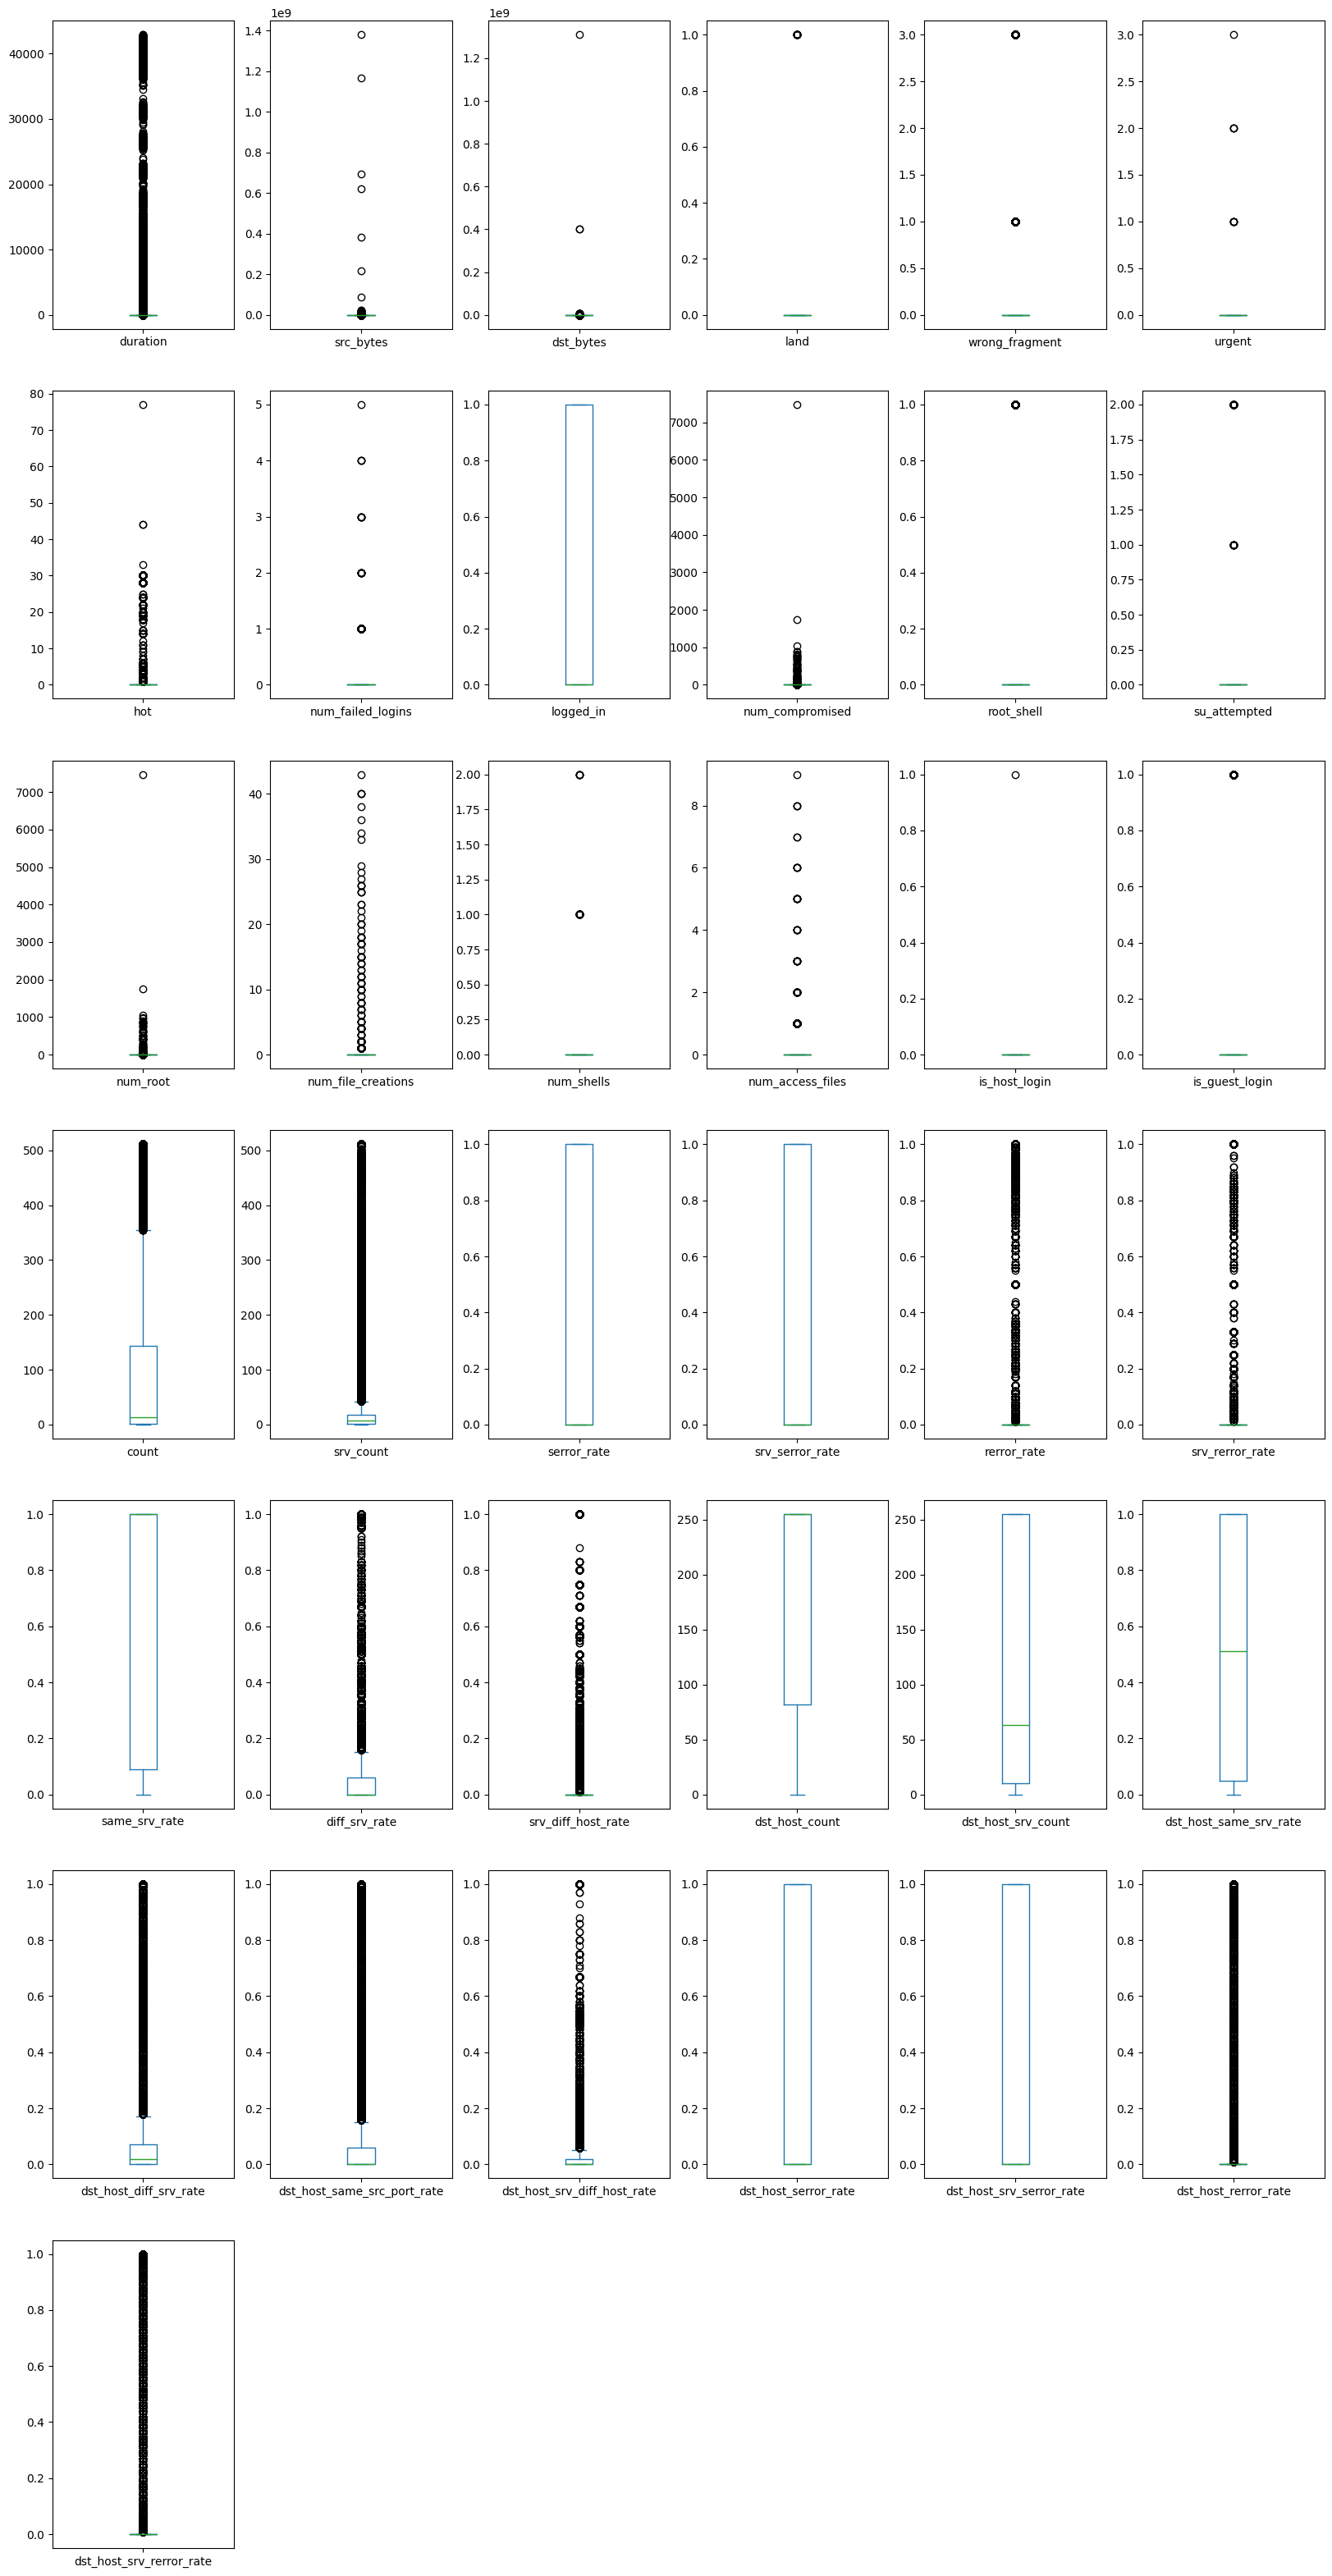

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,40))
train_data.plot(kind='box',subplots=True,layout=(7,6),figsize=(20,40))
plt.show()

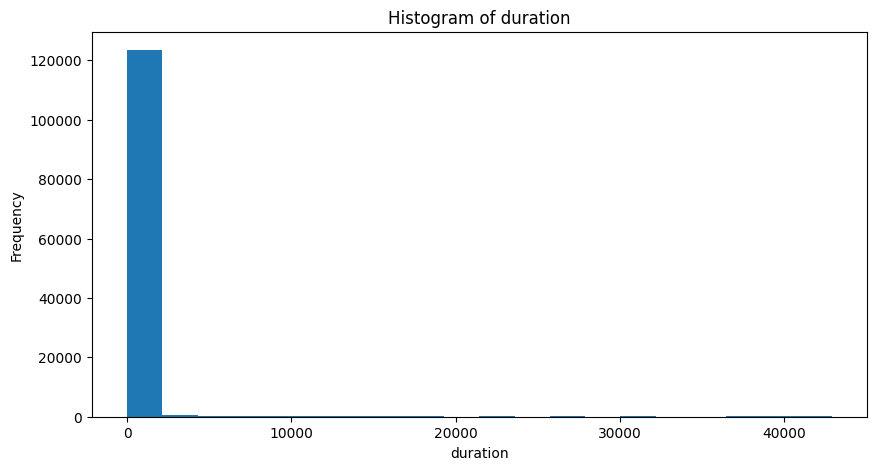

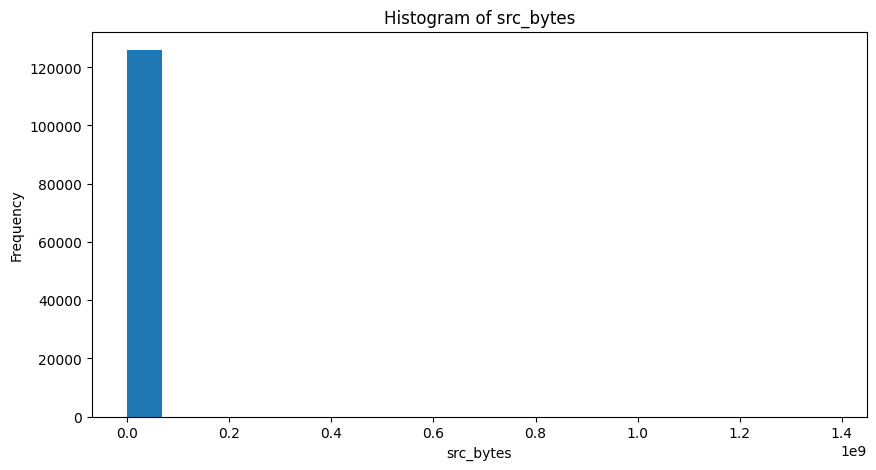

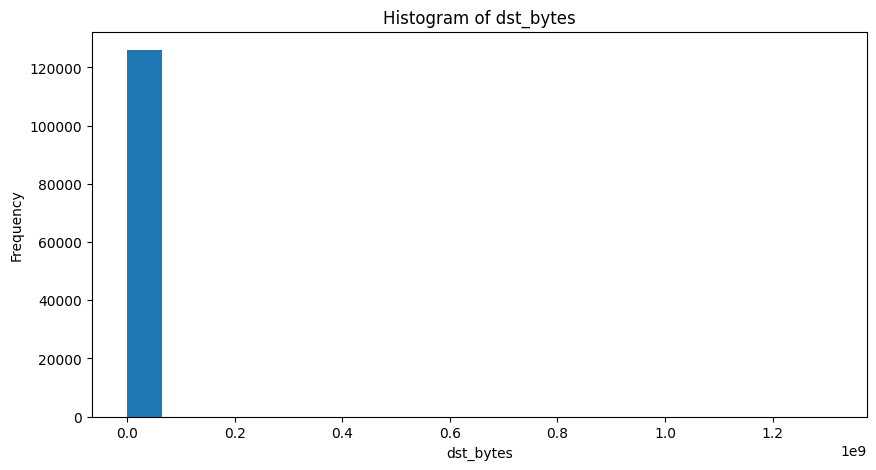

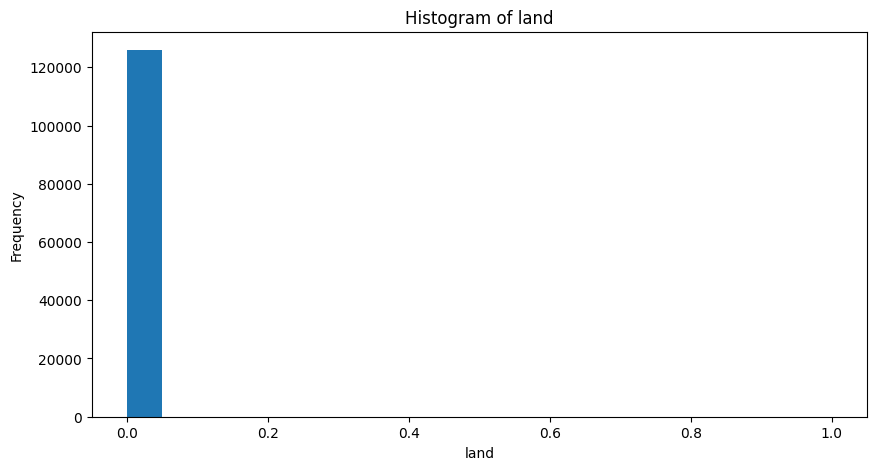

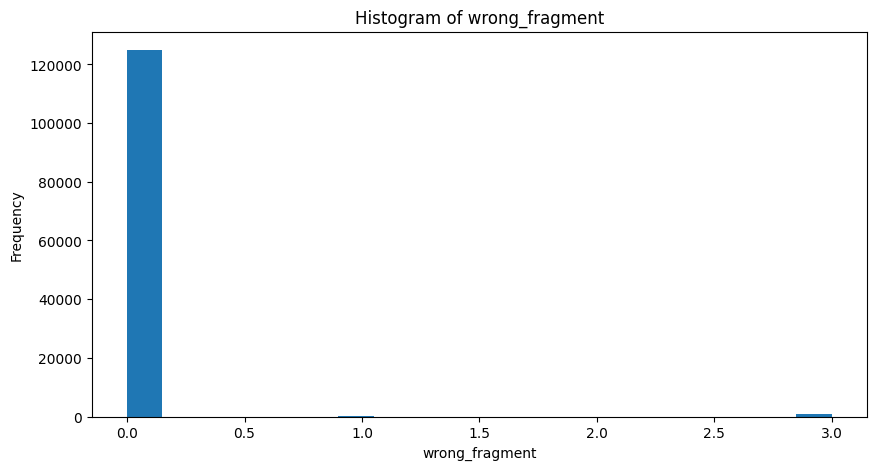

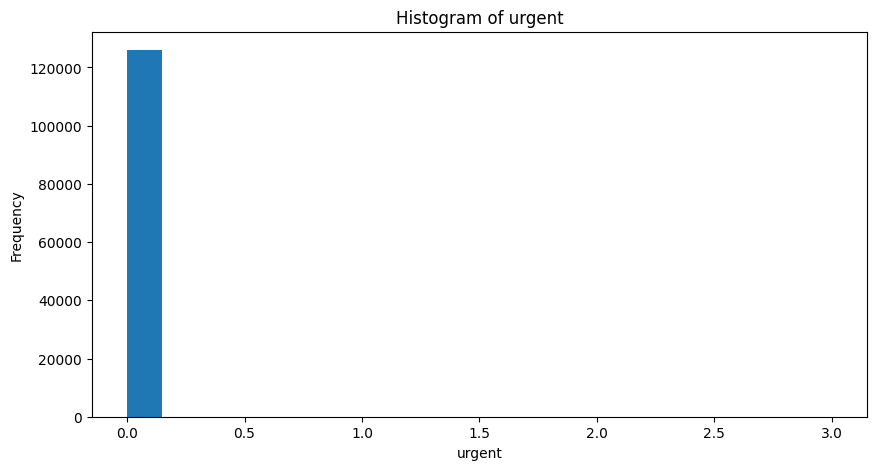

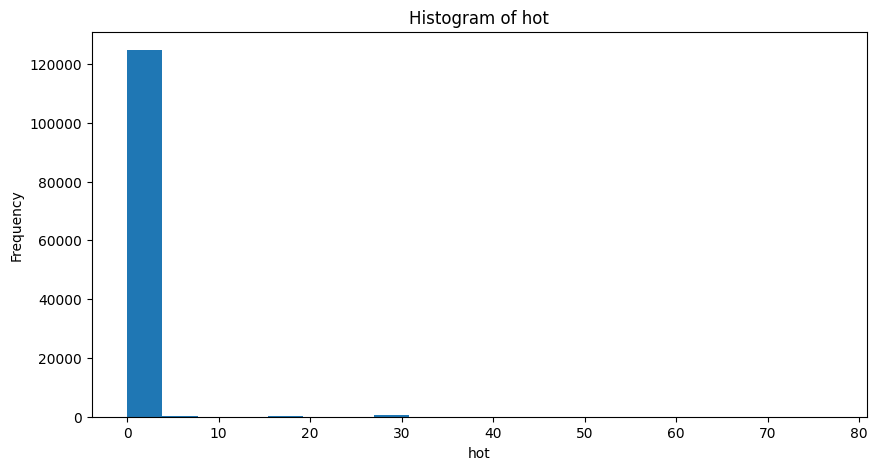

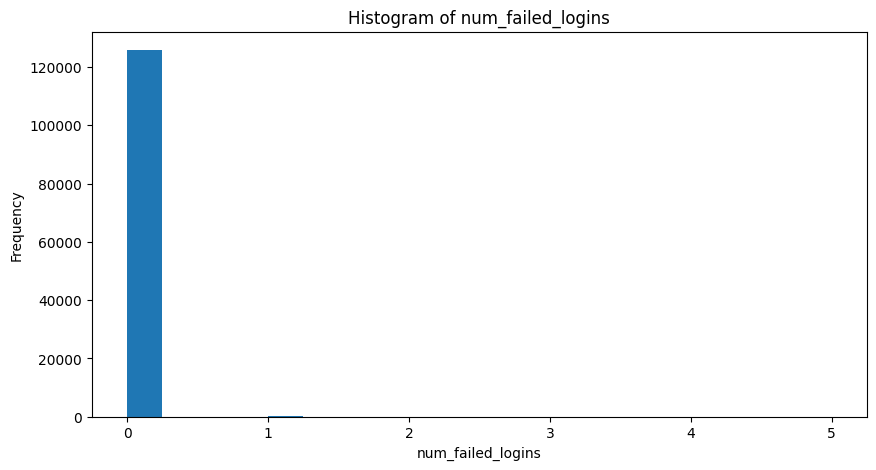

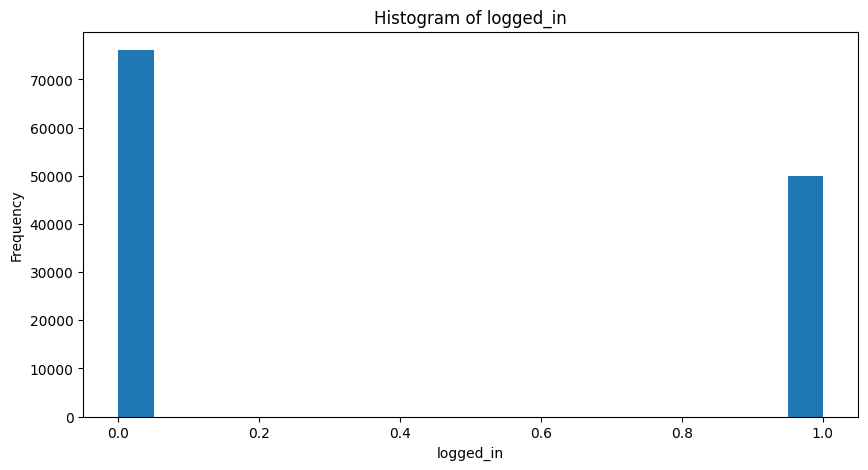

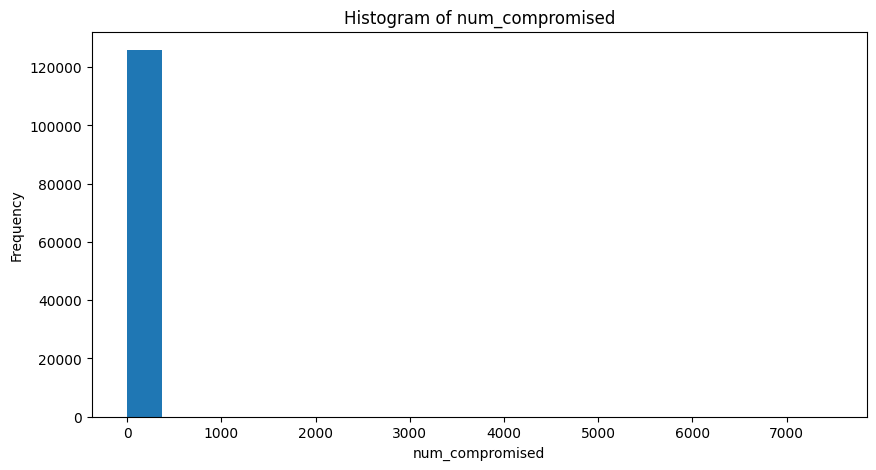

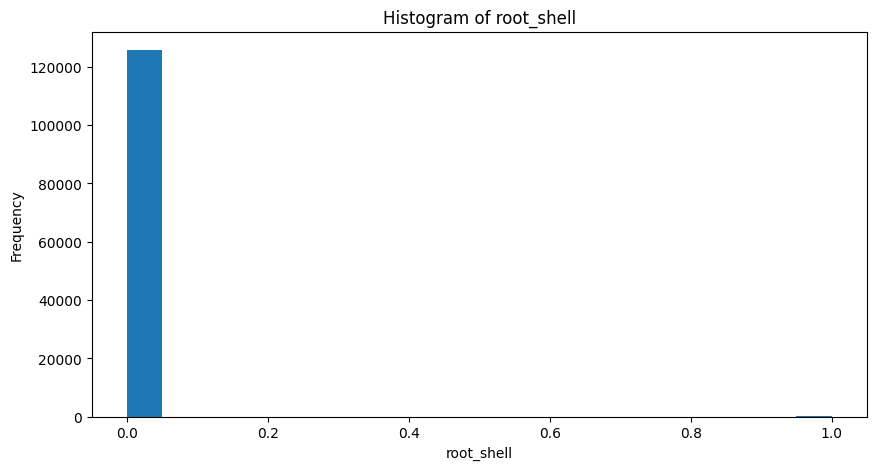

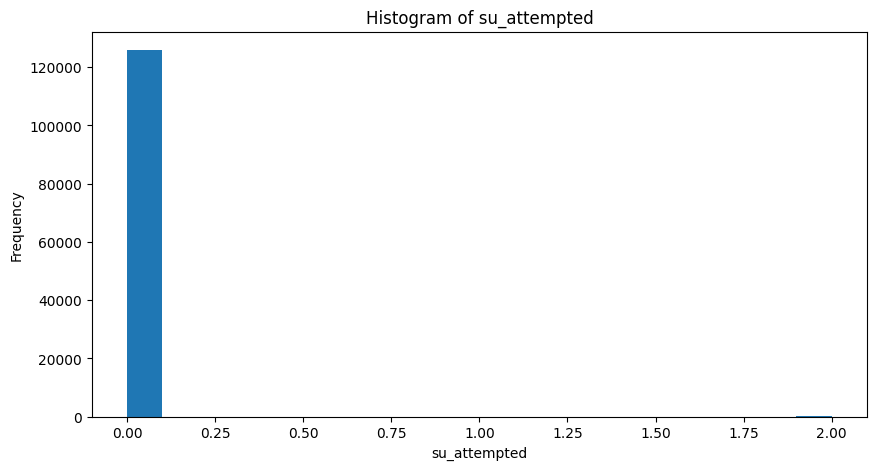

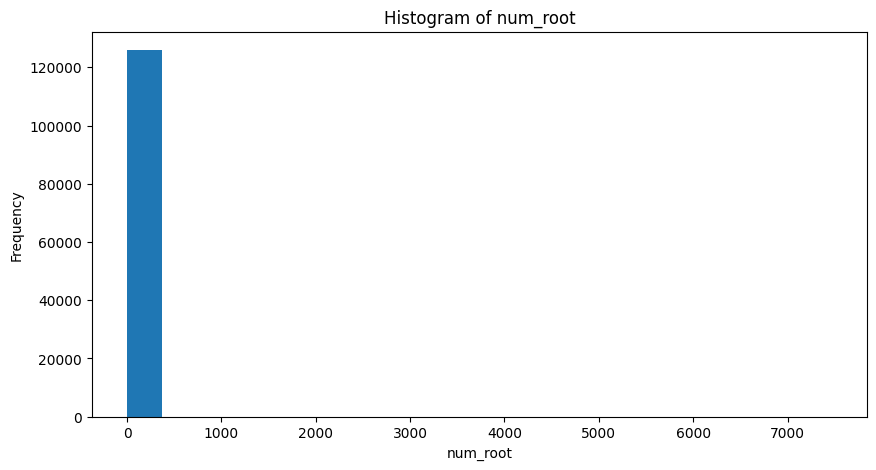

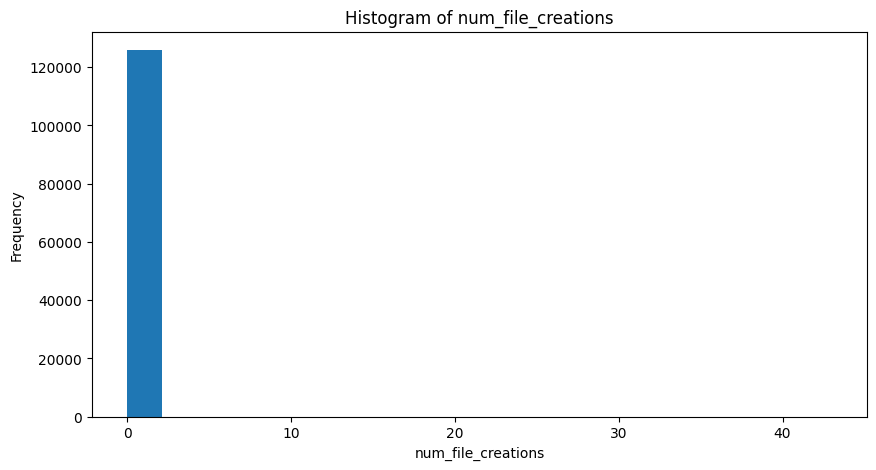

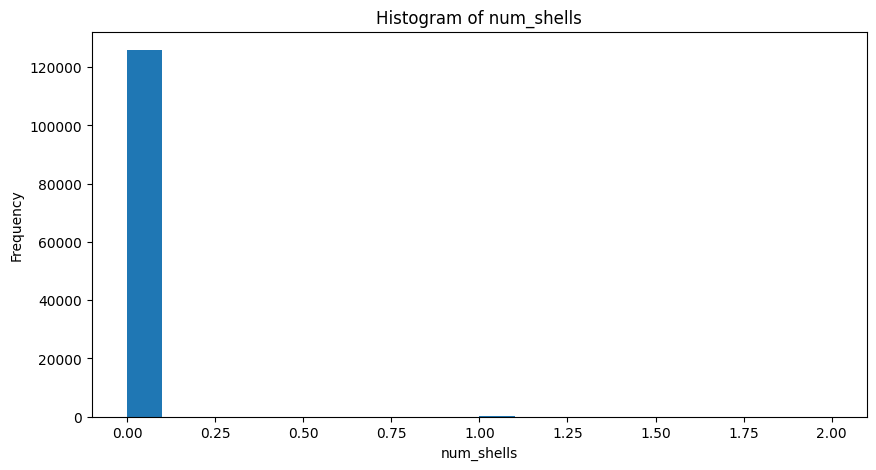

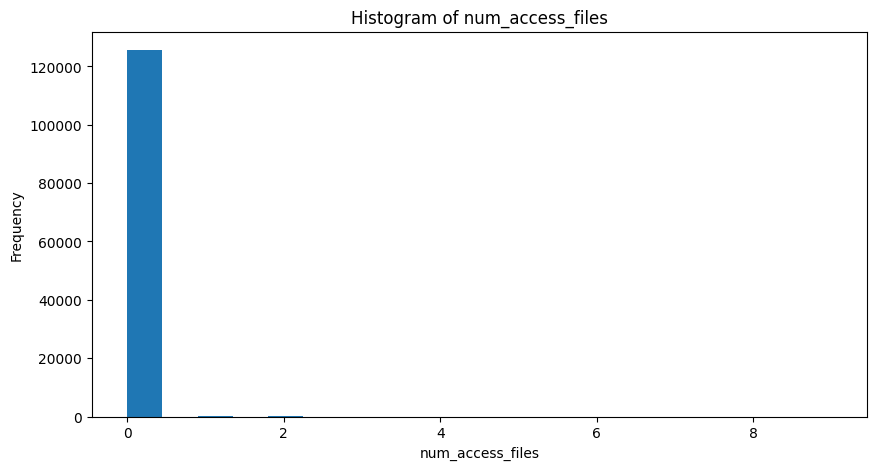

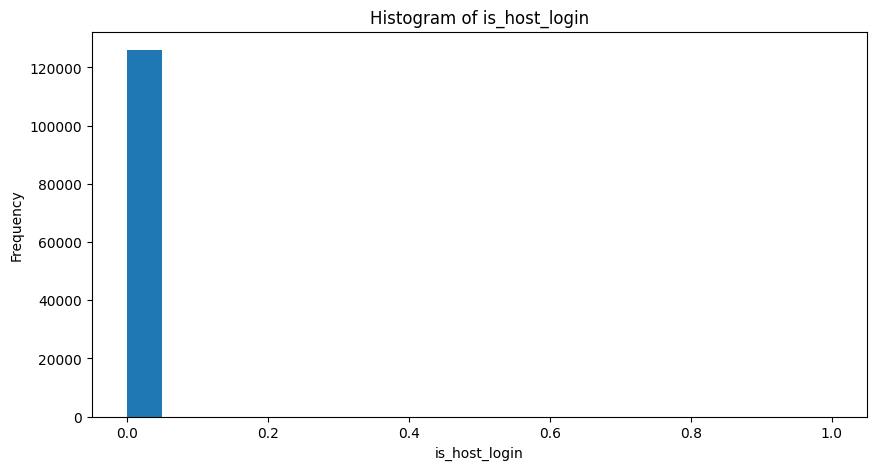

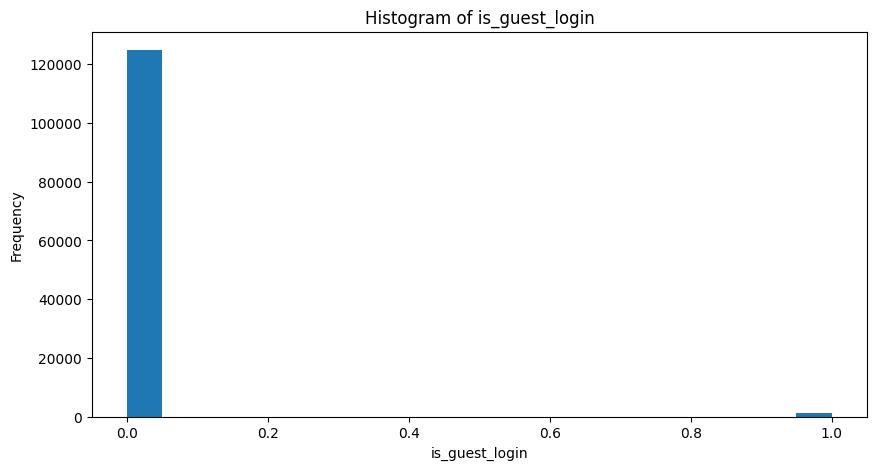

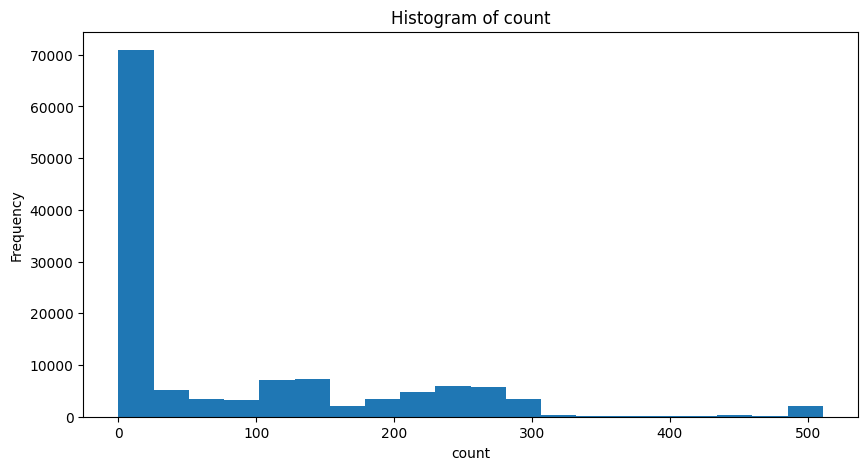

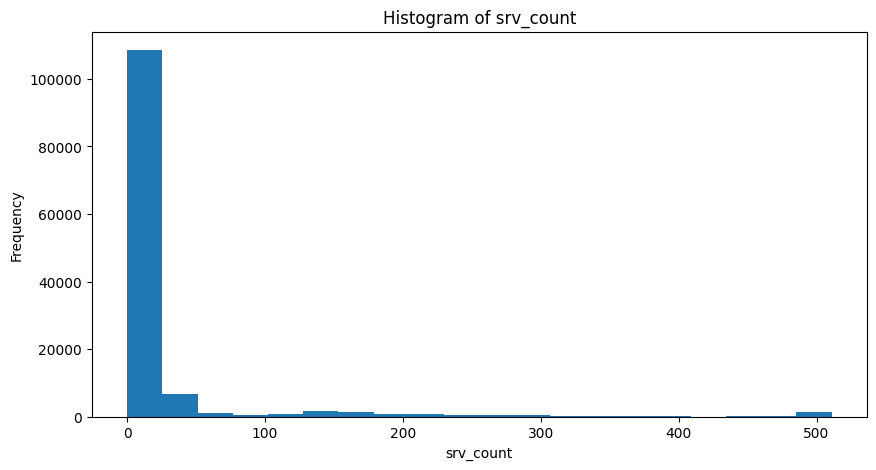

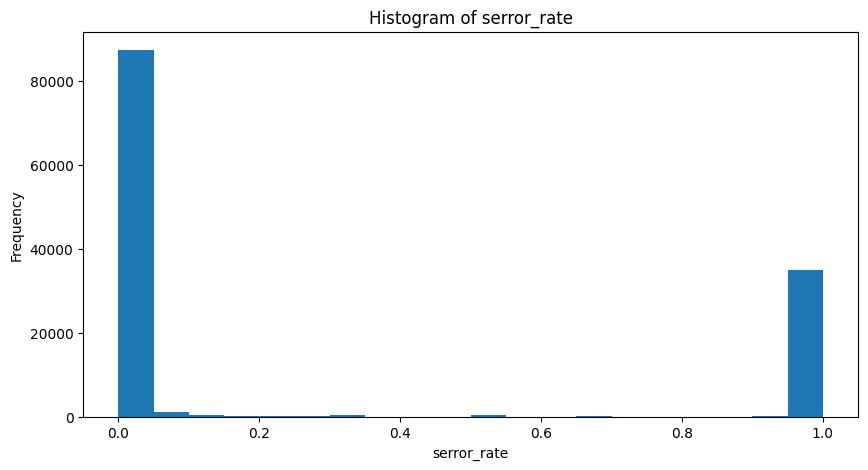

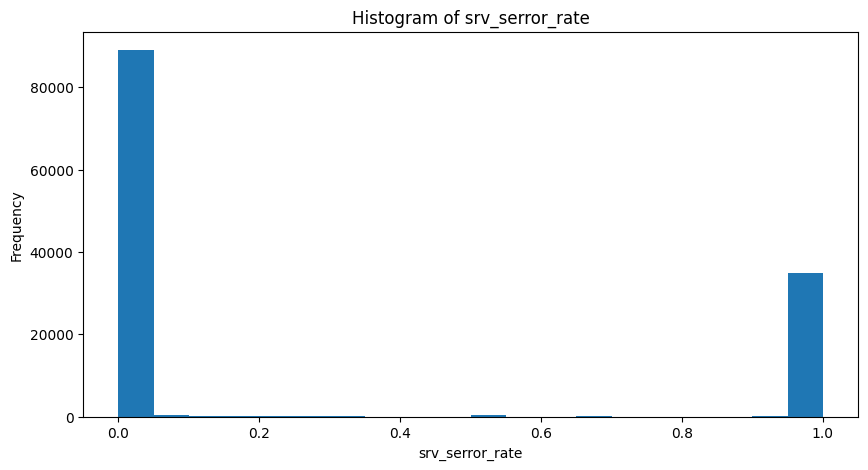

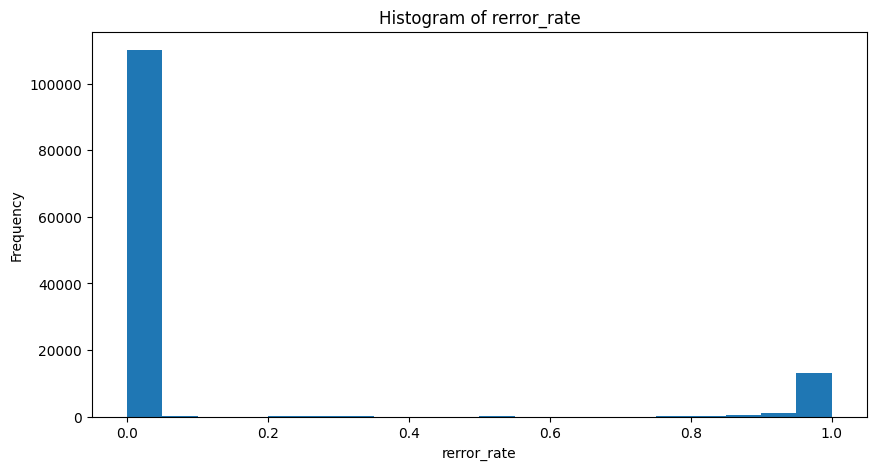

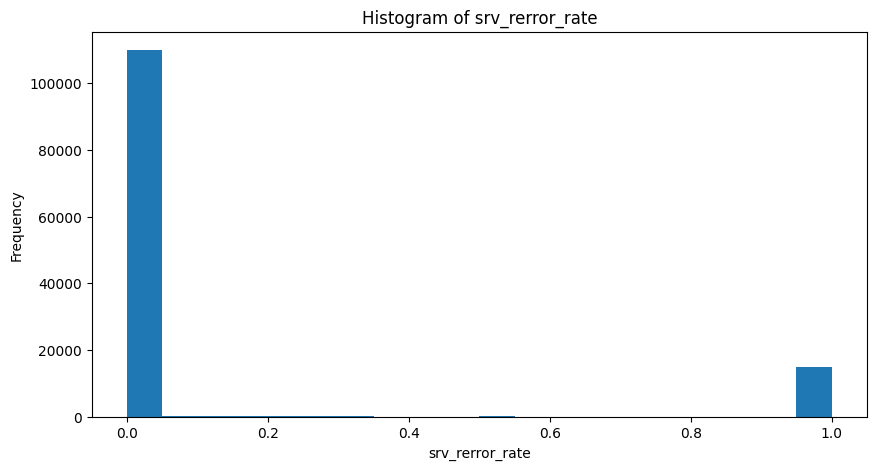

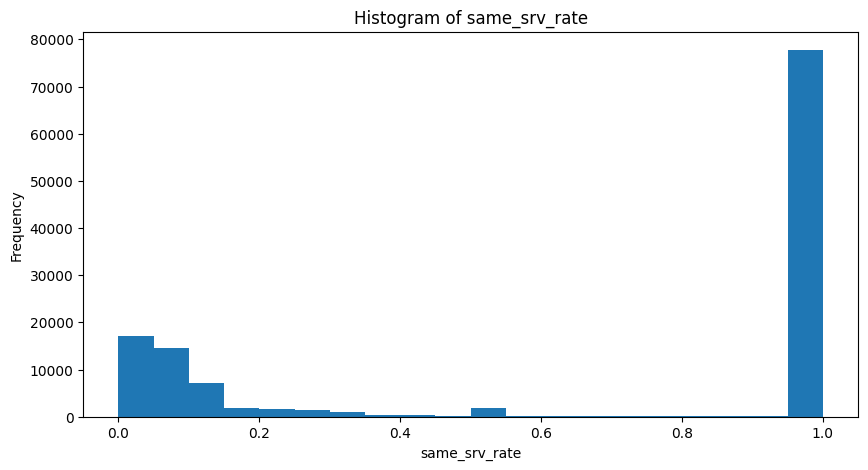

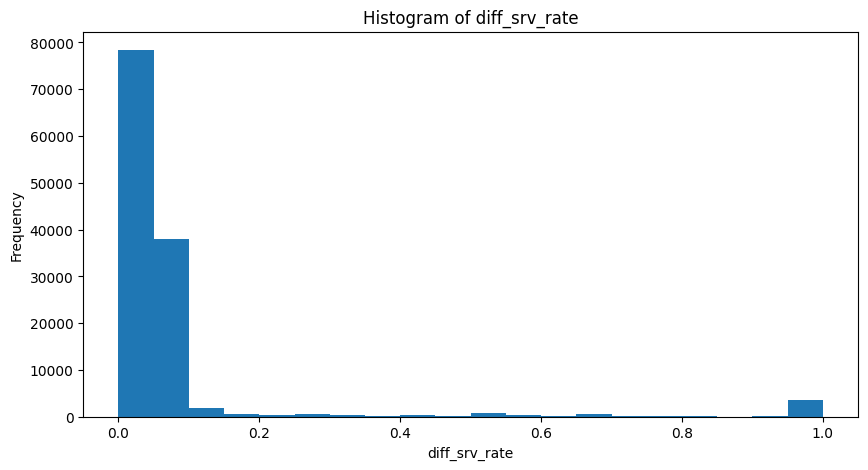

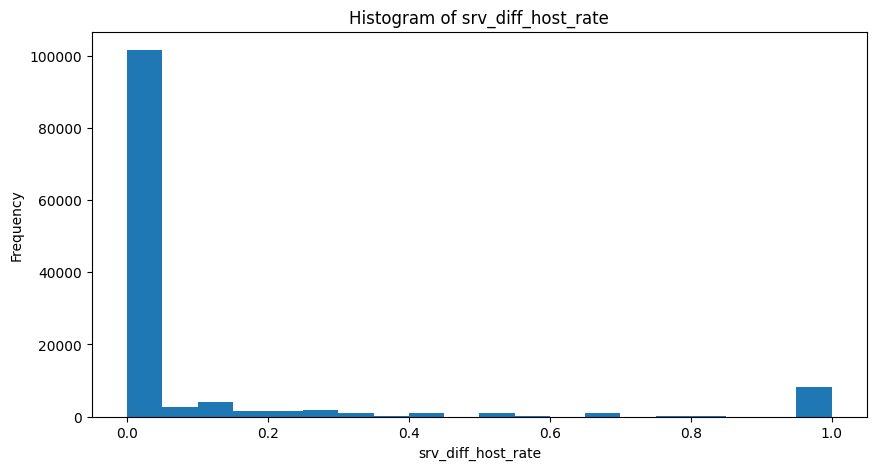

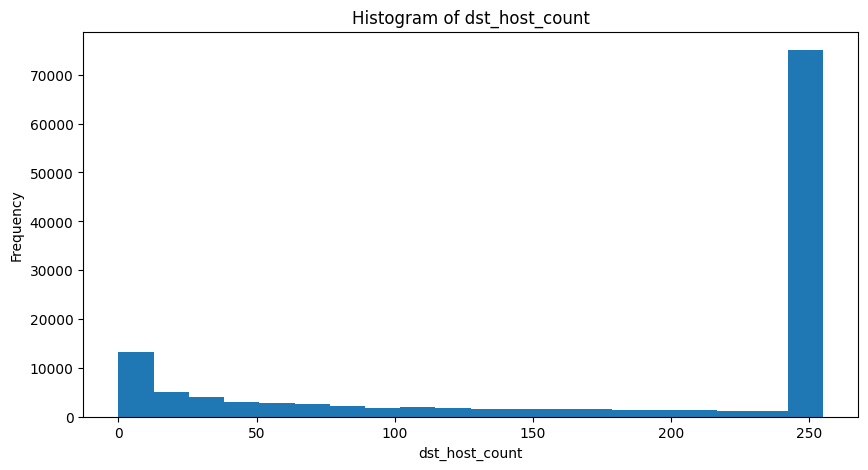

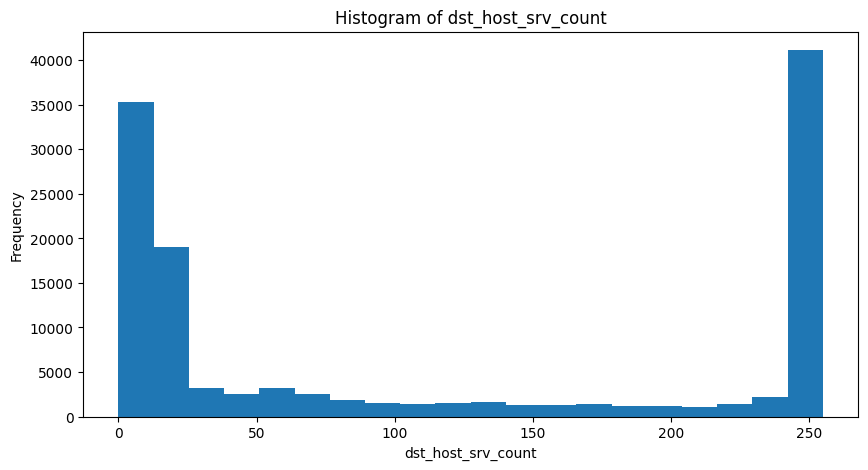

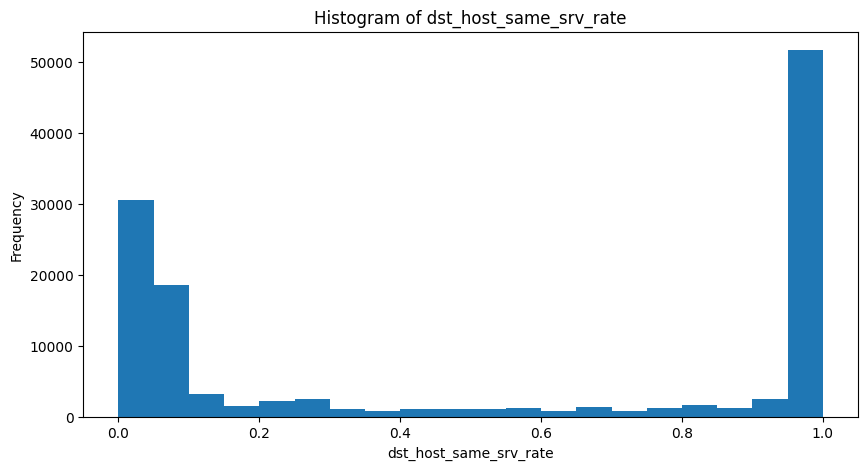

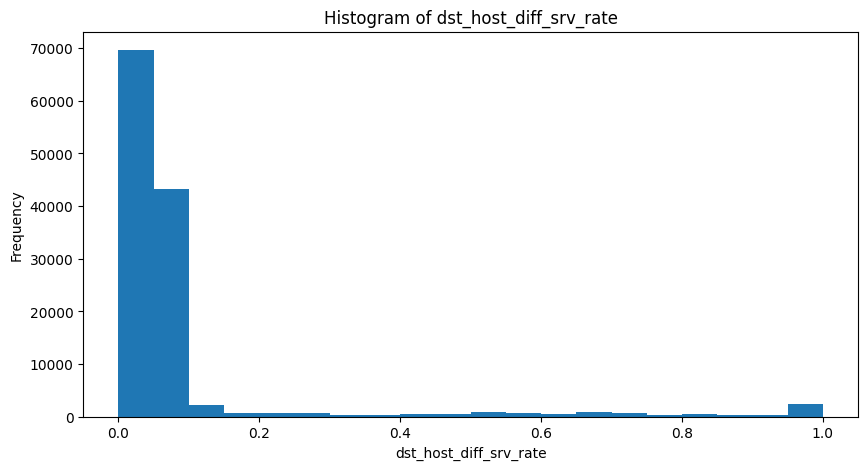

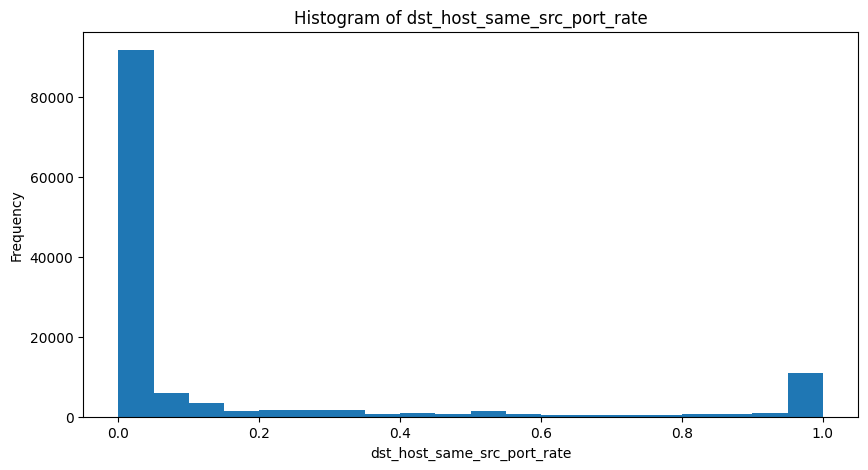

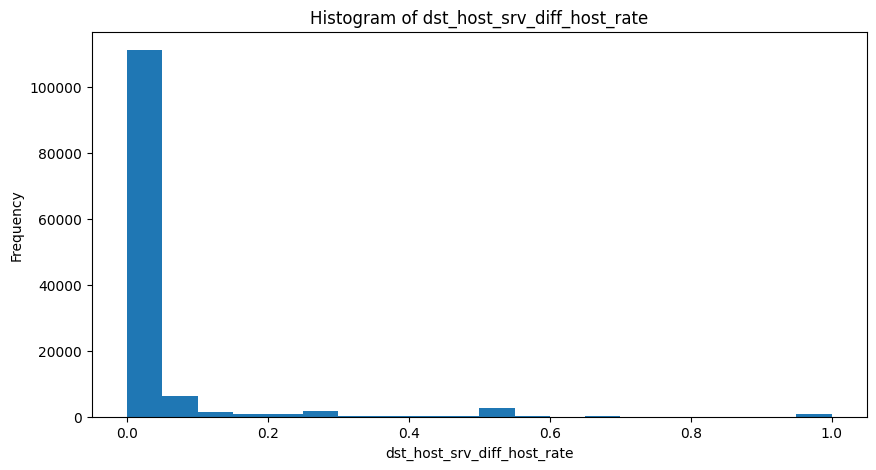

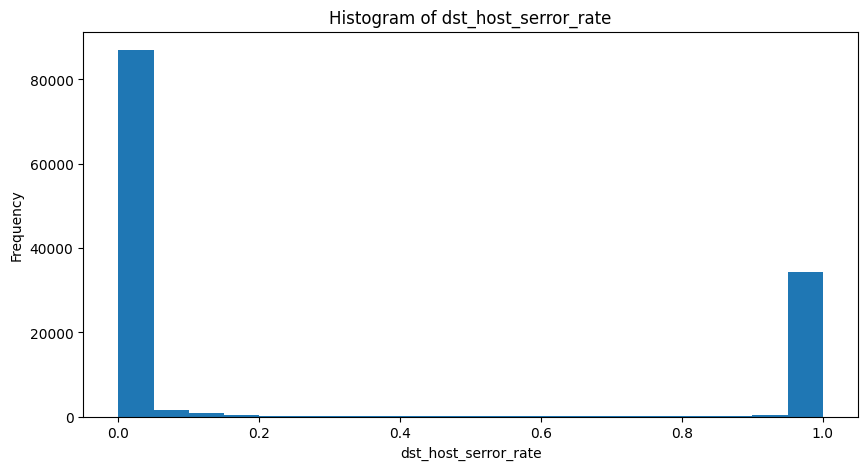

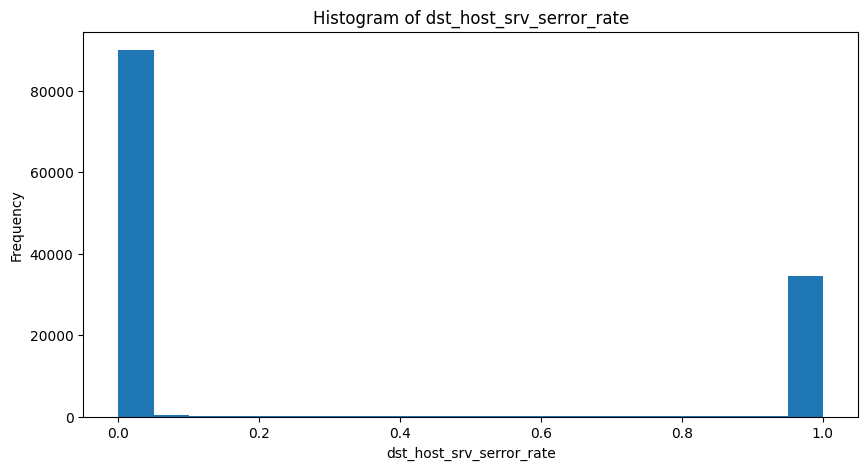

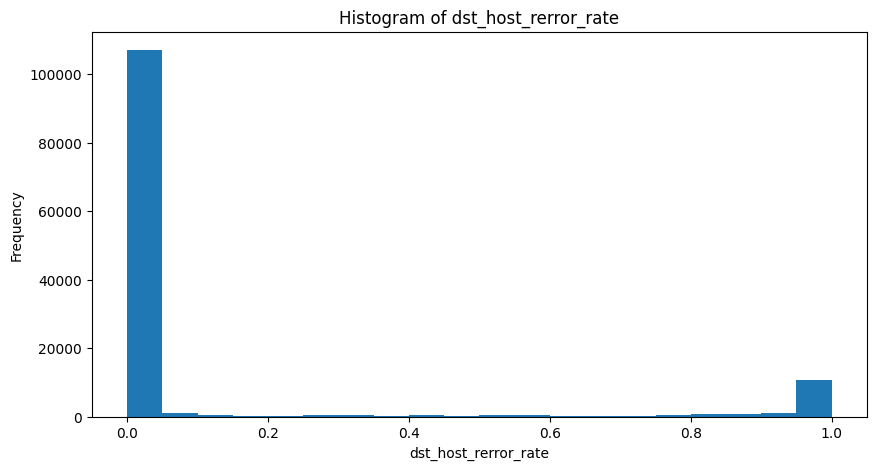

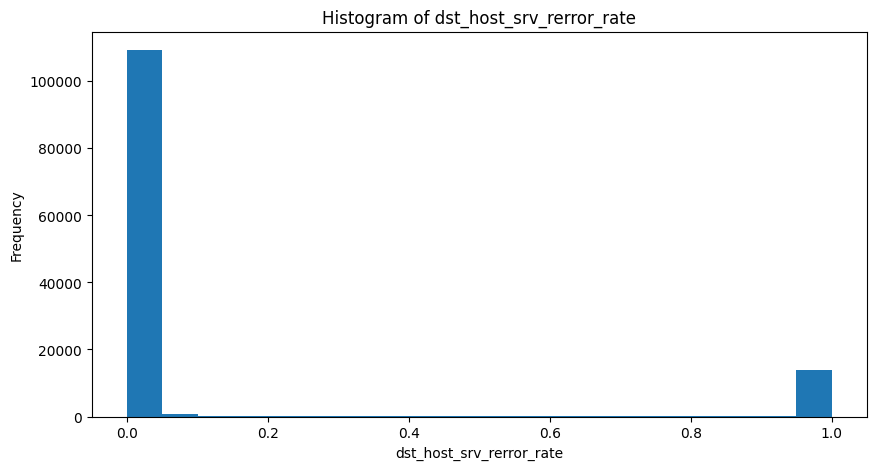

In [ ]:
num_col=train_data.select_dtypes(include=['number']).columns
for col in num_col:
  plt.figure(figsize=(10,5))
  plt.hist(train_data[col],bins=20,stacked='True')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()

In [ ]:
def get_details_atr():
  columns=train_data.select_dtypes(include=['object']).columns
  for i,col in enumerate(columns):
    unquie_val = train_data[col].unique()
    print(f'{col}: {len(unquie_val)}')
    print(f"{i+1}:{col} {unquie_val}")
    for val in unquie_val:
      print(f"\t{val} : {sum(train_data[col]==val)}")

In [ ]:
get_details_atr()

protocol_type: 3
1:protocol_type ['tcp' 'udp' 'icmp']
	tcp : 102689
	udp : 14993
	icmp : 8291
service: 70
2:service ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
	ftp_data : 6860
	other : 4359
	private : 21853
	http : 40338
	remote_job : 78
	name : 451
	netbios_ns : 347
	eco_i : 4586
	mtp : 439
	telnet : 2353
	finger : 1767
	domain_u : 9043
	supdup : 544
	uucp_path : 689
	Z39_50 : 862
	smtp : 7313
	csnet_ns : 545
	uucp : 7

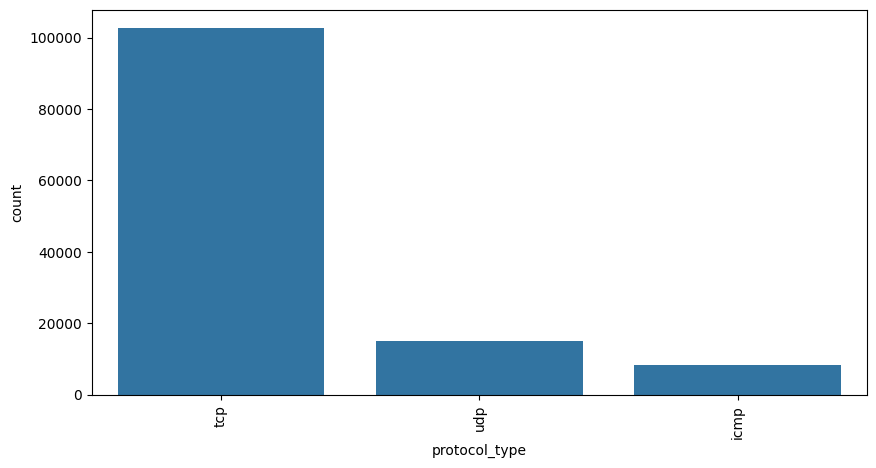

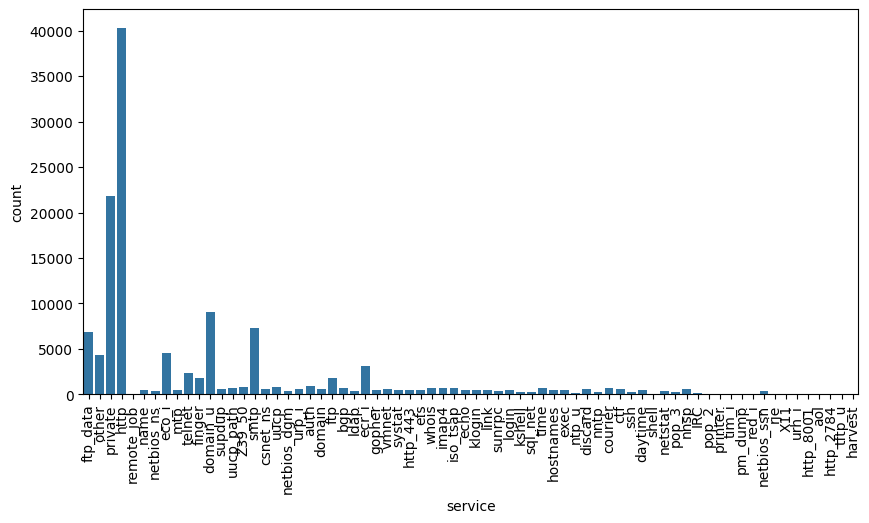

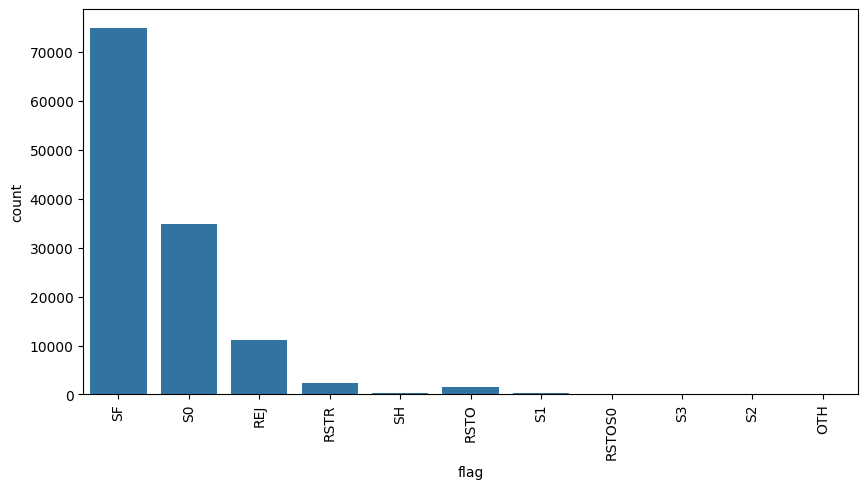

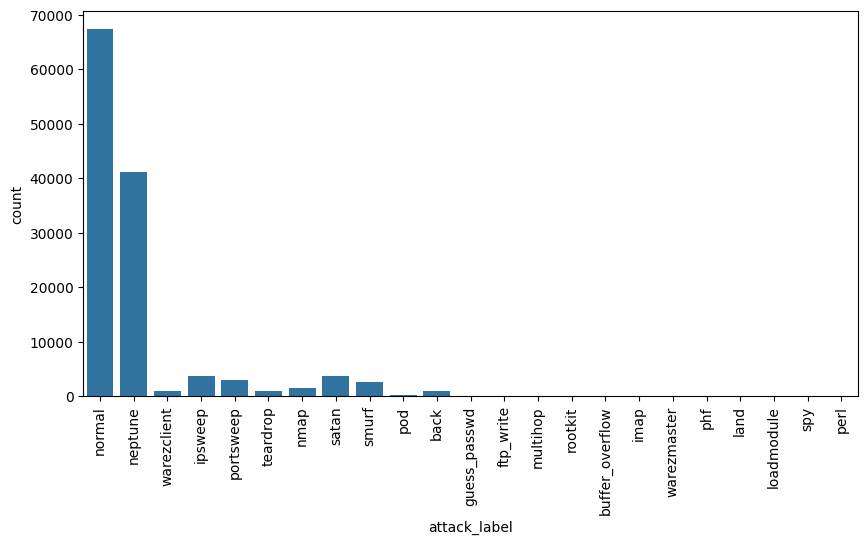

In [ ]:
for col in train_data.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=train_data)
  plt.xticks(rotation=90)
  plt.show()

# Binomary classification

In [ ]:
binomary_train_data=train_data.copy()
binomary_test_data=test_data.copy()
for val in binomary_train_data['attack_label'].unique():
  if val!='normal':
    binomary_train_data['attack_label'].replace(val,'attack',inplace=True)
for val in binomary_test_data['attack_label'].unique():
  if val!='normal':
    binomary_test_data['attack_label'].replace(val,'attack',inplace=True)

<ipython-input-25-596d1ce46eab>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  binomary_train_data['attack_label'].replace(val,'attack',inplace=True)
<ipython-input-25-596d1ce46eab>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
binomary_train_data['attack_label'].value_counts()

attack_label
normal    67343
attack    58630
Name: count, dtype: int64

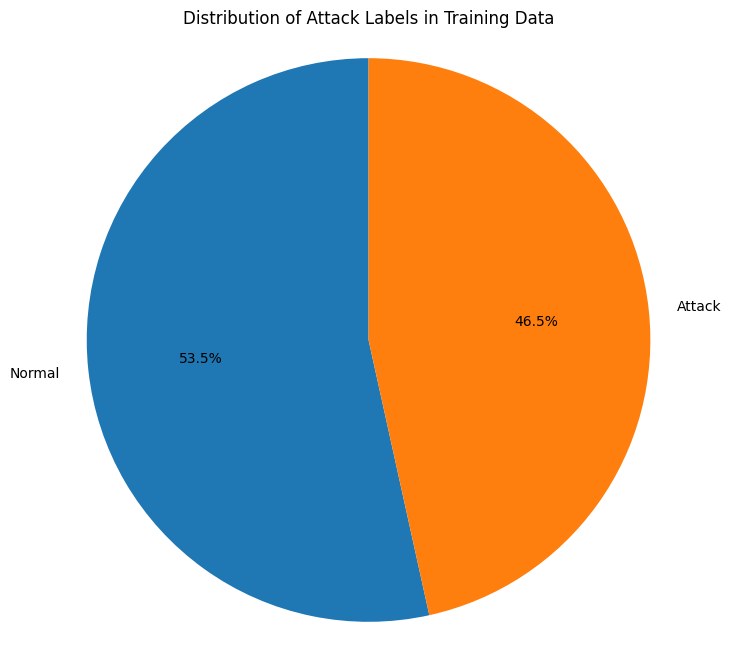

In [ ]:
attack_counts = binomary_train_data['attack_label'].value_counts()
plt.figure(figsize=(8, 8))
labels = ['Normal', 'Attack']
plt.pie(attack_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attack Labels in Training Data')
plt.axis('equal')
plt.show()

In [ ]:
print(f"Percentage of normal activities in train data:{sum(binomary_train_data['attack_label']=='normal')/binomary_train_data.shape[0]*100:0.2f}")
print(f"Percentage of attack activities in test data:{sum(binomary_train_data['attack_label']=='attack')/binomary_train_data.shape[0]*100:0.2f}")

Percentage of normal activities in train data:53.46
Percentage of attack activities in test data:46.54


In [ ]:
binomary_test_data['attack_label'].value_counts()

attack_label
attack    12833
normal     9711
Name: count, dtype: int64

In [ ]:
print(f"Percentage of normal activities in train data:{sum(binomary_test_data['attack_label']=='normal')/binomary_test_data.shape[0]*100:0.2f}")
print(f"Percentage of attack activities in test data:{sum(binomary_test_data['attack_label']=='attack')/binomary_test_data.shape[0]*100:0.2f}")

Percentage of normal activities in train data:43.08
Percentage of attack activities in test data:56.92


<Axes: xlabel='protocol_type', ylabel='count'>

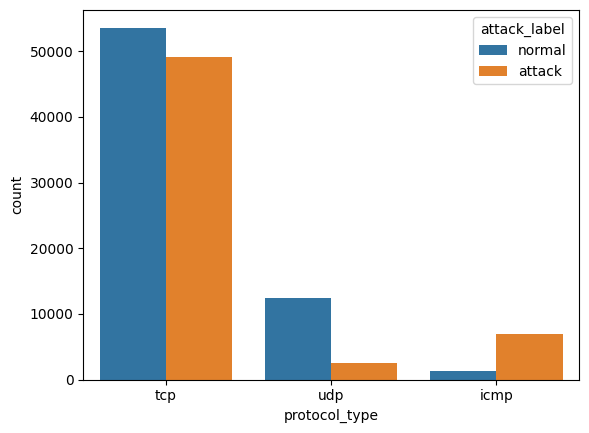

In [ ]:
sns.countplot(x=binomary_train_data['protocol_type'],data=binomary_train_data,hue='attack_label')

In [ ]:
binomary_train_data["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.815167
udp     0.119018
icmp    0.065816
Name: proportion, dtype: float64

<ipython-input-32-14d5f337d14c>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


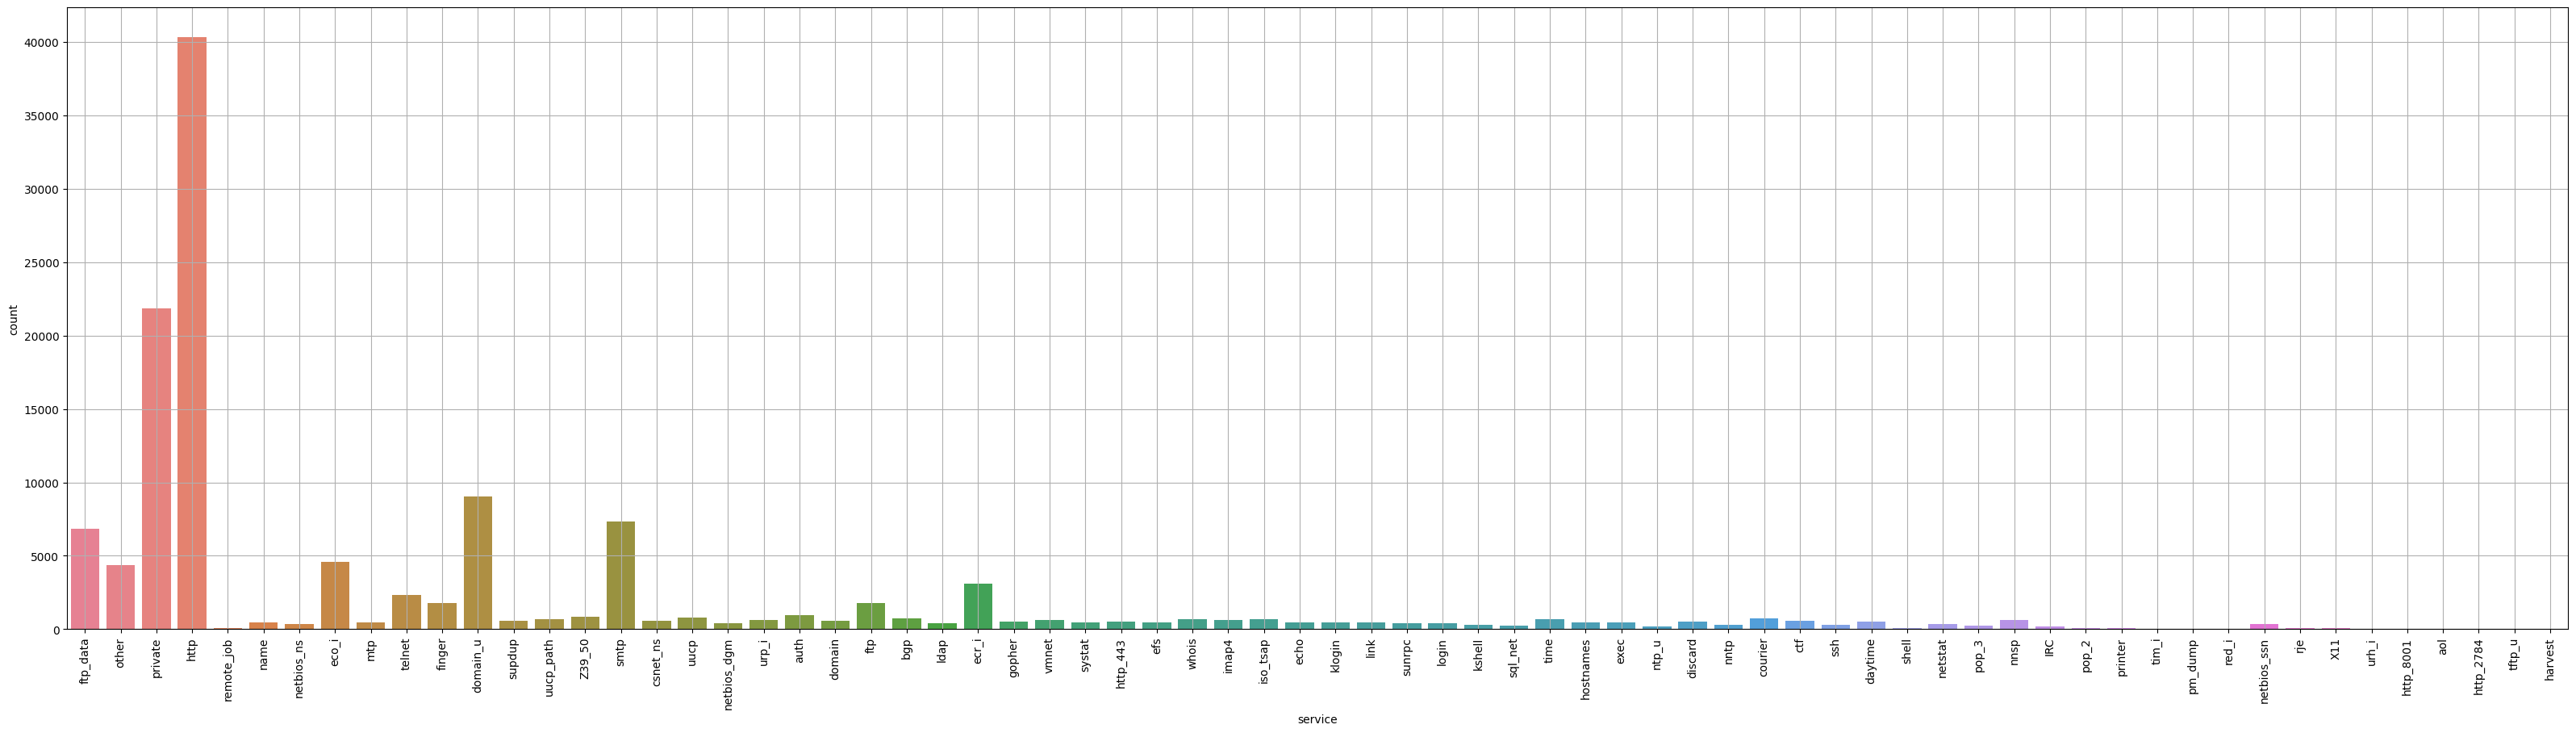

In [ ]:
#visualize service used in general
plt.figure(figsize=(40,10))
ax=sns.countplot(x='service',data=binomary_train_data,hue='service')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show()

<ipython-input-33-6401d01dcb15>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


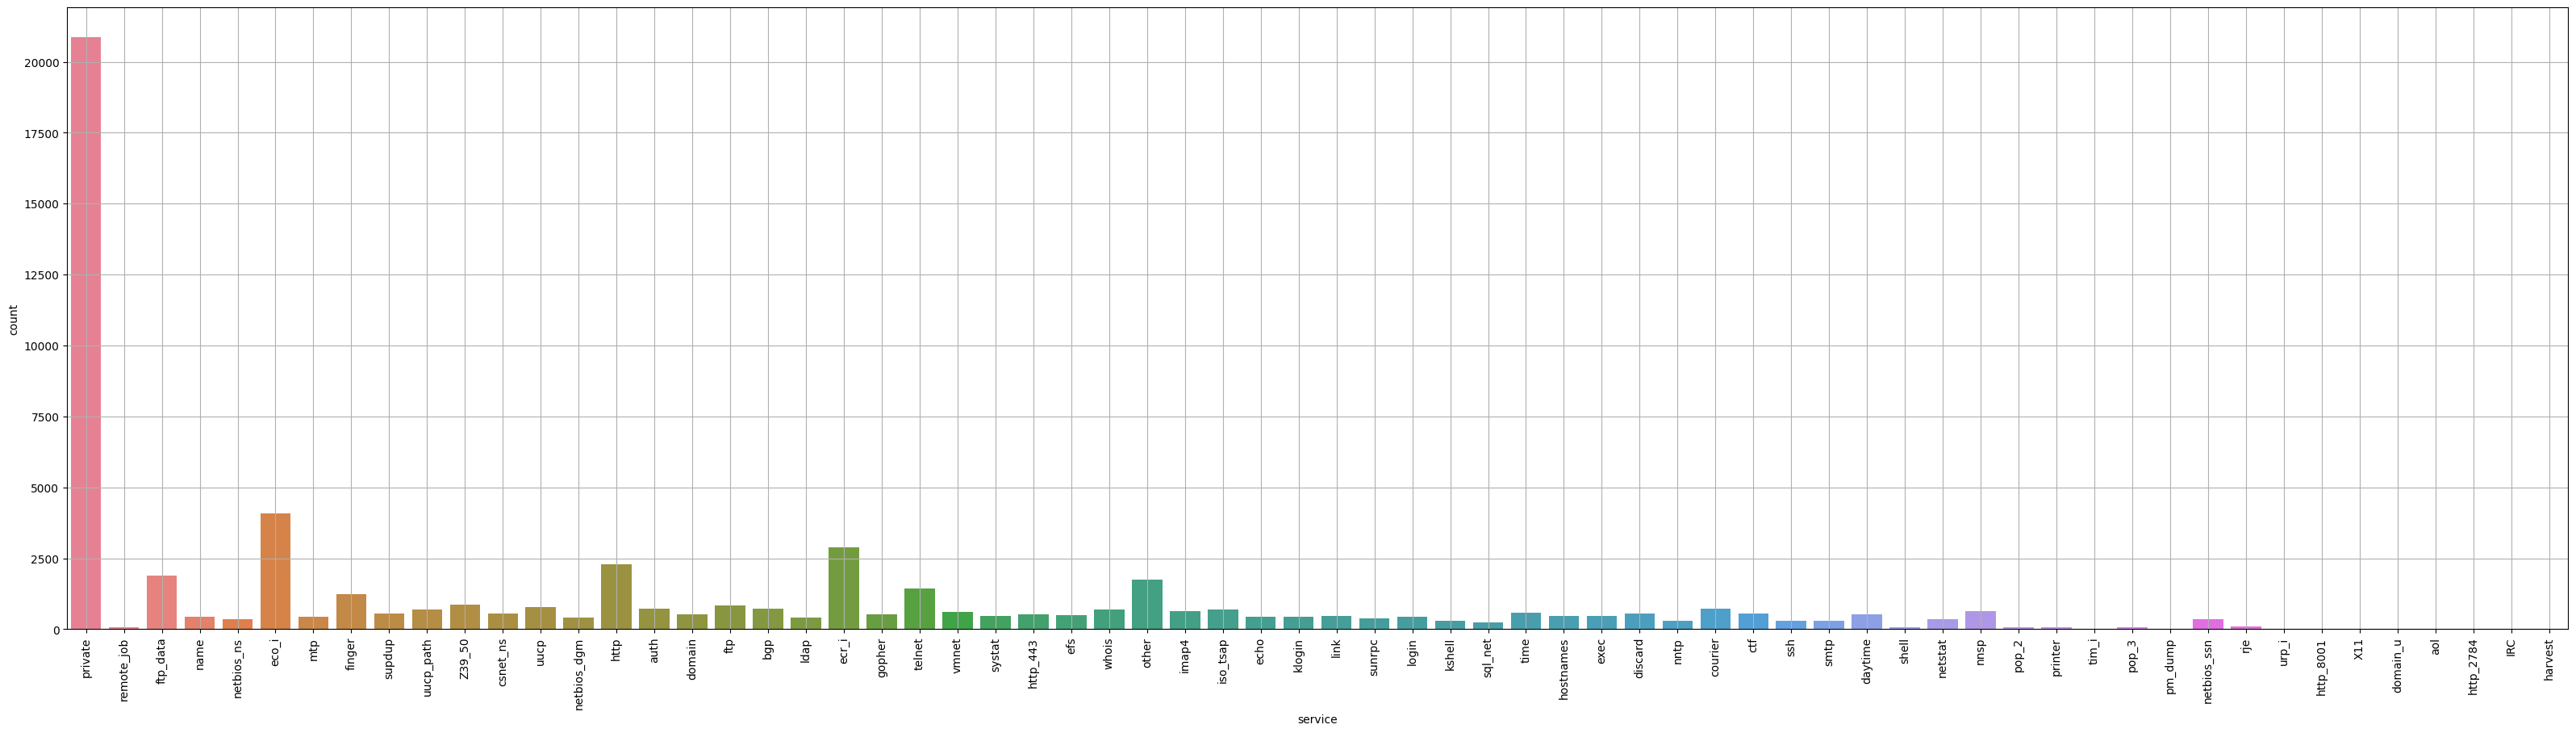

In [ ]:
#service used in attack
plt.figure(figsize=(40,10))
ax=sns.countplot(x='service',data=binomary_train_data[binomary_train_data['attack_label']=='attack'],hue='service')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show()
#mostly private

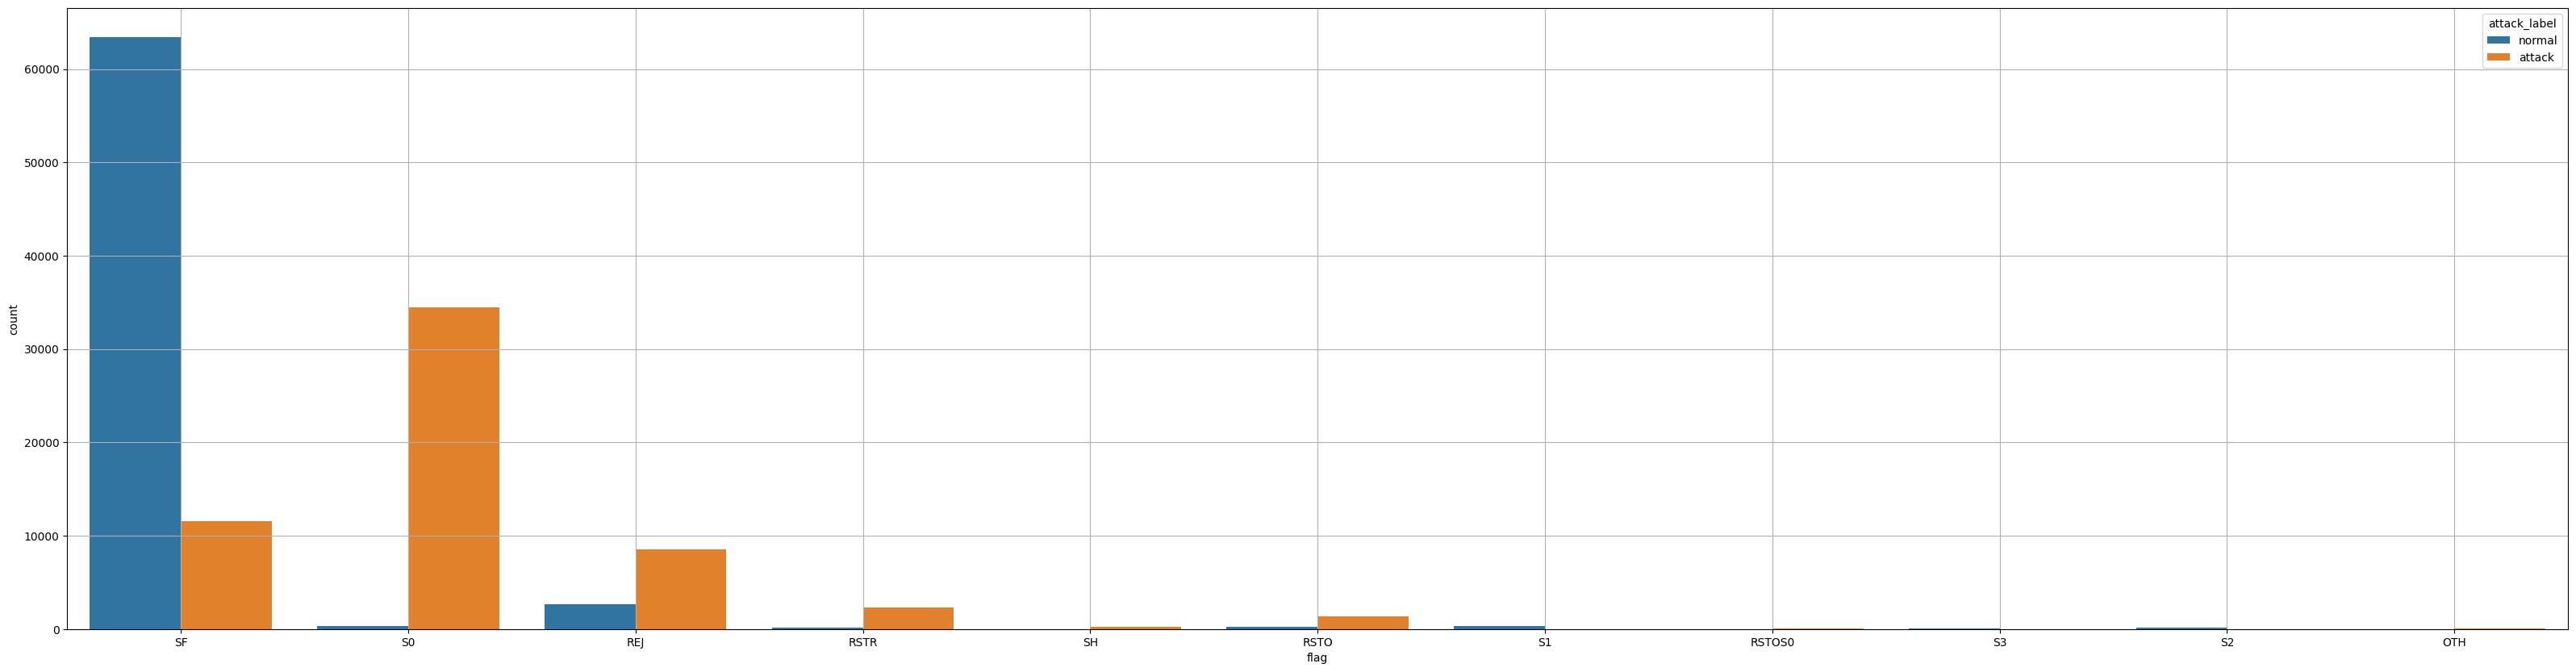

In [ ]:
plt.figure(figsize=(40,10))
ax=sns.countplot(x='flag',data=binomary_train_data,hue='attack_label')
plt.grid(True)
plt.show()
#mostly S0

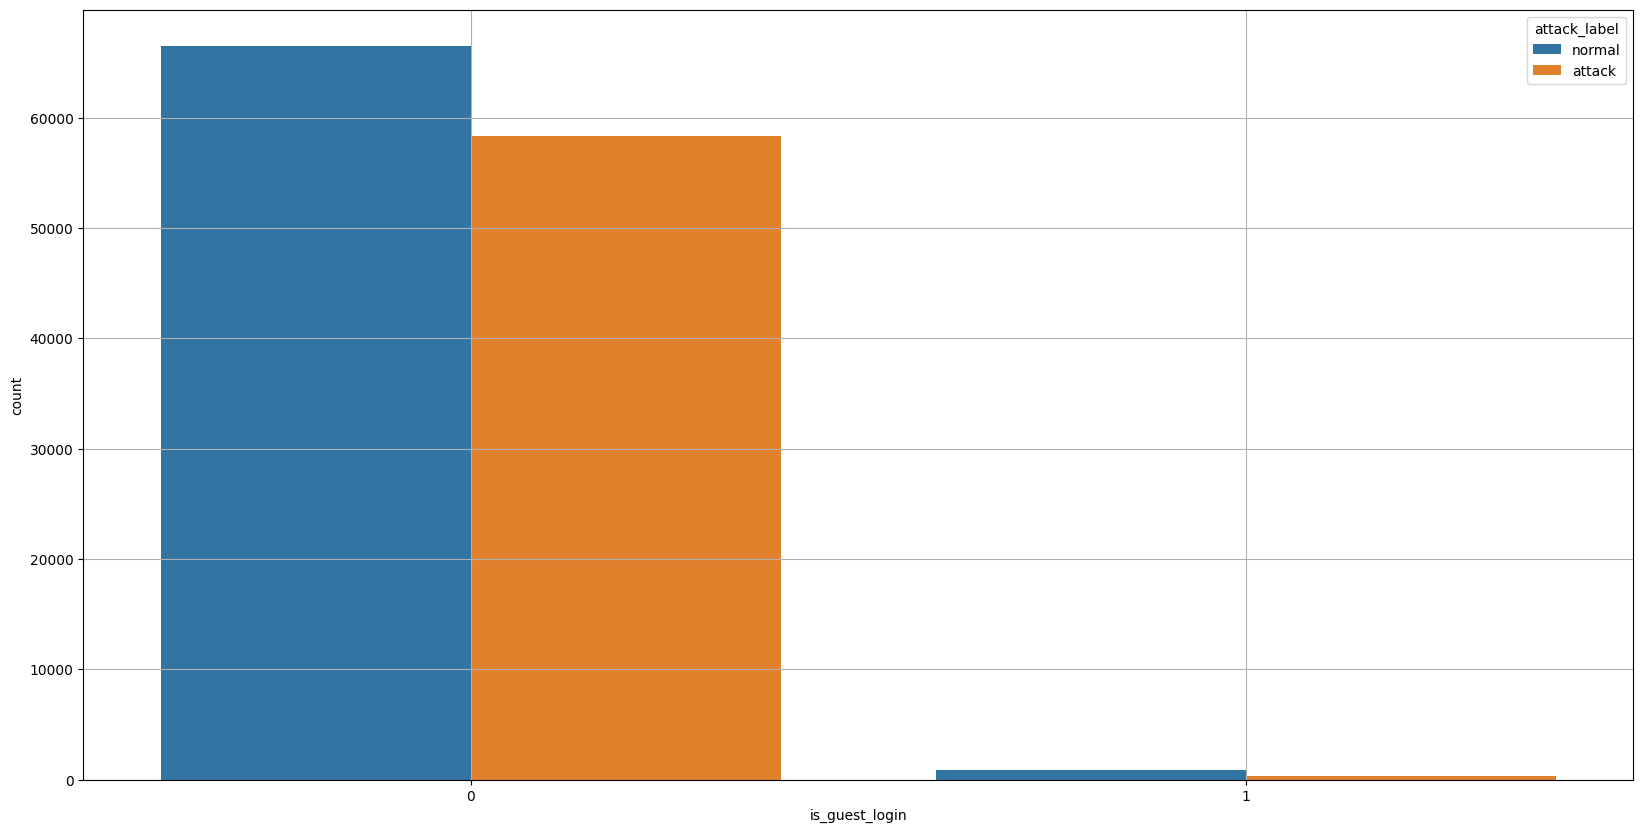

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='is_guest_login',data=binomary_train_data,hue='attack_label')
plt.grid(True)
plt.show()
#attack happen mostly when guest not login

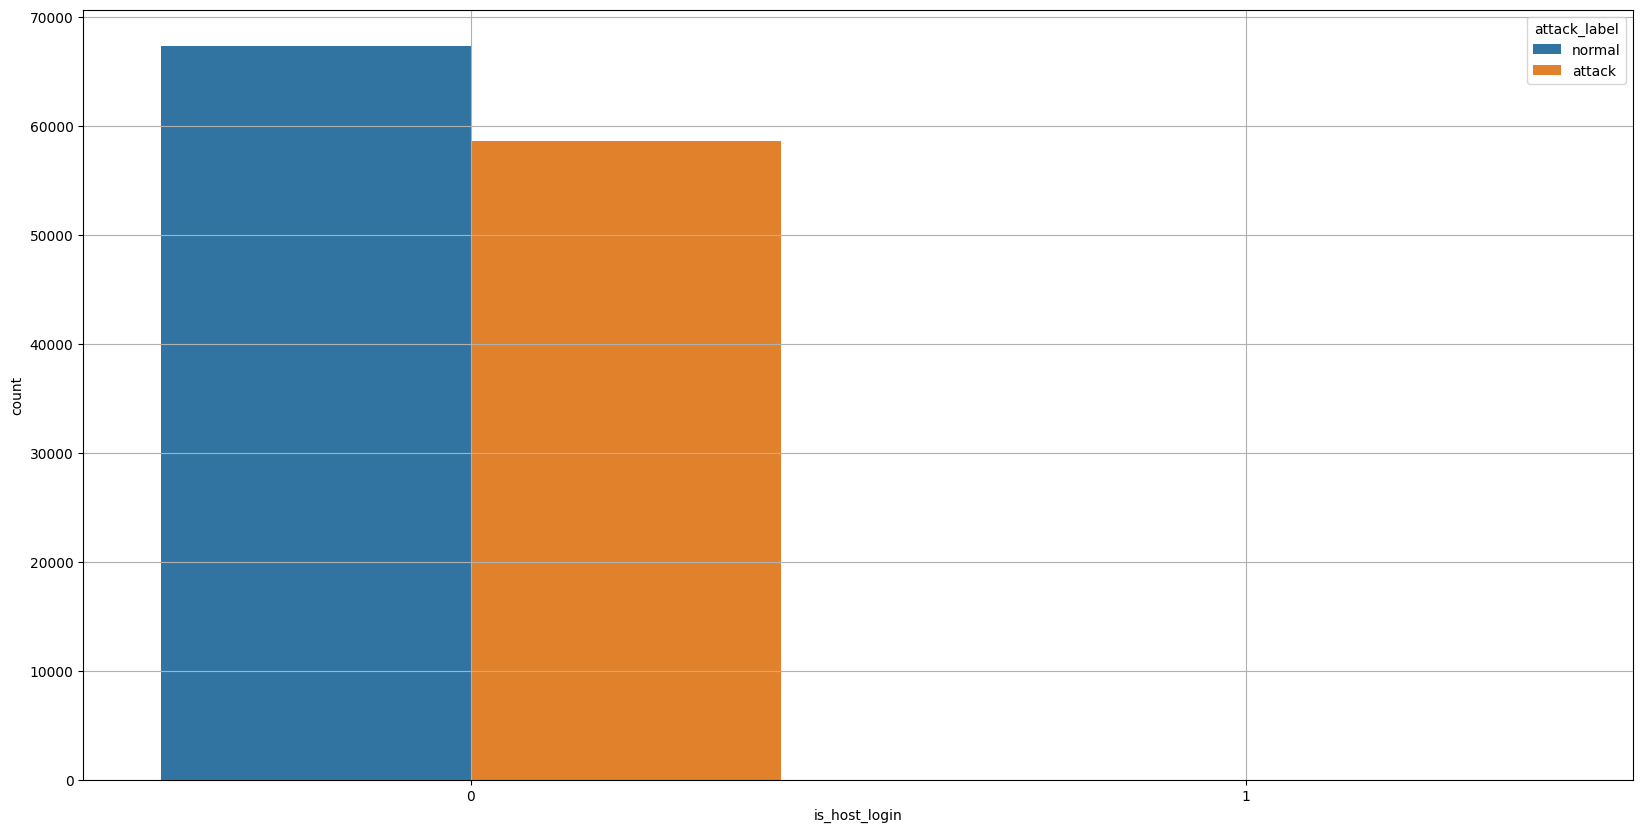

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='is_host_login',data=binomary_train_data,hue='attack_label')
plt.grid(True)
plt.show()

# Encoding

In [ ]:
binomary_train_data['attack_label']=binomary_train_data['attack_label'].where(binomary_train_data['attack_label']!='normal',0)
binomary_train_data['attack_label']=binomary_train_data['attack_label'].where(binomary_train_data['attack_label']!='attack',1)
binomary_train_data=binomary_train_data.astype({'attack_label':int})

In [ ]:
binomary_test_data['attack_label']=binomary_test_data['attack_label'].where(binomary_test_data['attack_label']!='normal',0)
binomary_test_data['attack_label']=binomary_test_data['attack_label'].where(binomary_test_data['attack_label']!='attack',1)
binomary_test_data=binomary_test_data.astype({'attack_label':int})

In [ ]:
categorical_columns = ['protocol_type', 'service', 'flag']
train_data_ohc = pd.get_dummies(binomary_train_data, columns=categorical_columns, dtype=int)
train_data_ohc

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        491          0     0               0       0    0   
1              0        146          0     0               0       0    0   
2              0          0          0     0               0       0    0   
3              0        232       8153     0               0       0    0   
4              0        199        420     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125968         0          0          0     0               0       0    0   
125969         8        105        145     0               0       0    0   
125970         0       2231        384     0               0       0    0   
125971         0          0          0     0               0       0    0   
125972         0        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0                       0          0                0  ...         0   
1                       0          0                0  ...         0   
2                       0          0                0  ...         0   
3                       0          1                0  ...         0   
4                       0          1                0  ...         0   
...                   ...        ...              ...  ...       ...   
125968                  0          0                0  ...         0   
125969                  0          0                0  ...         0   
125970                  0          1                0  ...         0   
125971                  0          0                0  ...         0   
125972                  0          1                0  ...         0   

        flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0               0            0          0        0        0        0        0   
1               0            0          0        0        0        0        0   
2               0            0          0        1        0        0        0   
3               0            0          0        0        0        0        0   
4               0            0          0        0        0        0        0   
...           ...          ...        ...      ...      ...      ...      ...   
125968          0            0          0        1        0        0        0   
125969          0            0          0        0        0        0        0   
125970          0            0          0        0        0        0        0   
125971          0            0          0        1        0        0        0   
125972          0            0          0        0        0        0        0   

        flag_SF  flag_SH  
0             1        0  
1             1        0  
2             0        0  
3             1        0  
4             1        0  
...         ...      ...  
125968        0        0  
125969        1        0  
125970        1        0  
125971        0        0  
125972        1        0  

[125973 rows x 122 columns]

In [ ]:
test_data_ohc=pd.get_dummies(binomary_test_data,columns=categorical_columns,dtype=int)
test_data_ohc

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             0          0          0     0               0       0    0   
1             0          0          0     0               0       0    0   
2             2      12983          0     0               0       0    0   
3             0         20          0     0               0       0    0   
4             1          0         15     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
22539         0        794        333     0               0       0    0   
22540         0        317        938     0               0       0    0   
22541         0      54540       8314     0               0       0    2   
22542         0         42         42     0               0       0    0   
22543         0          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0                      0          0                0  ...         1   
1                      0          0                0  ...         1   
2                      0          0                0  ...         0   
3                      0          0                0  ...         0   
4                      0          0                0  ...         0   
...                  ...        ...              ...  ...       ...   
22539                  0          1                0  ...         0   
22540                  0          1                0  ...         0   
22541                  0          1                1  ...         0   
22542                  0          0                0  ...         0   
22543                  0          0                0  ...         1   

       flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0              0            0          0        0        0        0        0   
1              0            0          0        0        0        0        0   
2              0            0          0        0        0        0        0   
3              0            0          0        0        0        0        0   
4              1            0          0        0        0        0        0   
...          ...          ...        ...      ...      ...      ...      ...   
22539          0            0          0        0        0        0        0   
22540          0            0          0        0        0        0        0   
22541          0            0          0        0        0        0        0   
22542          0            0          0        0        0        0        0   
22543          0            0          0        0        0        0        0   

       flag_SF  flag_SH  
0            0        0  
1            0        0  
2            1        0  
3            1        0  
4            0        0  
...        ...      ...  
22539        1        0  
22540        1        0  
22541        1        0  
22542        1        0  
22543        0        0  

[22544 rows x 116 columns]

In [ ]:
print(train_data_ohc.shape)
print(test_data_ohc.shape)

(125973, 122)
(22544, 116)


In [ ]:
col_diff=list(set(train_data_ohc.columns)-set(test_data_ohc.columns))
col_diff

['service_red_i',
 'service_harvest',
 'service_aol',
 'service_http_2784',
 'service_urh_i',
 'service_http_8001']

In [ ]:
for col in col_diff:
  test_data_ohc[col]=0
test_data_ohc.shape

(22544, 122)

In [ ]:
x_train_df=train_data_ohc[train_data_ohc.columns.difference(['attack_label'])]
y_train_df=train_data_ohc['attack_label']
x_test_df=test_data_ohc[test_data_ohc.columns.difference(['attack_label'])]
y_test_df=test_data_ohc['attack_label']

In [ ]:
x_train_df.head()

count  diff_srv_rate  dst_bytes  dst_host_count  dst_host_diff_srv_rate  \
0      2           0.00          0             150                    0.03   
1     13           0.15          0             255                    0.60   
2    123           0.07          0             255                    0.05   
3      5           0.00       8153              30                    0.00   
4     30           0.00        420             255                    0.00   

   dst_host_rerror_rate  dst_host_same_src_port_rate  dst_host_same_srv_rate  \
0                  0.05                         0.17                    0.17   
1                  0.00                         0.88                    0.00   
2                  0.00                         0.00                    0.10   
3                  0.00                         0.03                    1.00   
4                  0.00                         0.00                    1.00   

   dst_host_serror_rate  dst_host_srv_count  ...  service_vmnet  \
0                  0.00                  25  ...              0   
1                  0.00                   1  ...              0   
2                  1.00                  26  ...              0   
3                  0.03                 255  ...              0   
4                  0.00                 255  ...              0   

   service_whois  src_bytes  srv_count  srv_diff_host_rate  srv_rerror_rate  \
0              0        491          2                0.00              0.0   
1              0        146          1                0.00              0.0   
2              0          0          6                0.00              0.0   
3              0        232          5                0.00              0.0   
4              0        199         32                0.09              0.0   

   srv_serror_rate  su_attempted  urgent  wrong_fragment  
0              0.0             0       0               0  
1              0.0             0       0               0  
2              1.0             0       0               0  
3              0.2             0       0               0  
4              0.0             0       0               0  

[5 rows x 121 columns]

In [ ]:
x_test_df.head()

count  diff_srv_rate  dst_bytes  dst_host_count  dst_host_diff_srv_rate  \
0    229           0.06          0             255                    0.06   
1    136           0.06          0             255                    0.06   
2      1           0.00          0             134                    0.04   
3      1           0.00          0               3                    0.00   
4      1           0.00         15              29                    0.17   

   dst_host_rerror_rate  dst_host_same_src_port_rate  dst_host_same_srv_rate  \
0                  1.00                         0.00                    0.04   
1                  1.00                         0.00                    0.00   
2                  0.00                         0.61                    0.61   
3                  0.00                         1.00                    1.00   
4                  0.83                         0.03                    0.31   

   dst_host_serror_rate  dst_host_srv_count  ...  service_vmnet  \
0                   0.0                  10  ...              0   
1                   0.0                   1  ...              0   
2                   0.0                  86  ...              0   
3                   0.0                  57  ...              0   
4                   0.0                  86  ...              0   

   service_whois  src_bytes  srv_count  srv_diff_host_rate  srv_rerror_rate  \
0              0          0         10                0.00              1.0   
1              0          0          1                0.00              1.0   
2              0      12983          1                0.00              0.0   
3              0         20         65                1.00              0.0   
4              0          0          8                0.75              0.5   

   srv_serror_rate  su_attempted  urgent  wrong_fragment  
0             0.00             0       0               0  
1             0.00             0       0               0  
2             0.00             0       0               0  
3             0.00             0       0               0  
4             0.12             0       0               0  

[5 rows x 121 columns]

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_name=x_train_df.columns
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train_df)
x_test=scaler.transform(x_test_df)

# Feature Engineering

# Recursive Feature Elimination (RFE)
using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time
rf_model=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
t0=time.time()
rf_model.fit(x_train,y_train_df)
train_time=time.time()-t0
print(f"Training time: {train_time:0.2f}s")

Training time: 12.35s


In [ ]:
train_score=rf_model.score(x_train,y_train_df)
train_score

0.999944432537131

In [ ]:
y_pred=rf_model.predict(x_test)

In [ ]:
test_score=rf_model.score(x_test,y_test_df)
test_score

0.7751508161816891

In [ ]:
report=pd.DataFrame({'Model':['Random Forest Pre Feature Selection'], 'train':train_score,'test':test_score,'train time':train_time})
report

Model     train      test  train time
0  Random Forest Pre Feature Selection  0.999944  0.775151   12.350678

In [ ]:
random_forest=metrics.confusion_matrix(y_test_df,y_pred)
random_forest

array([[9452,  259],
       [4810, 8023]])

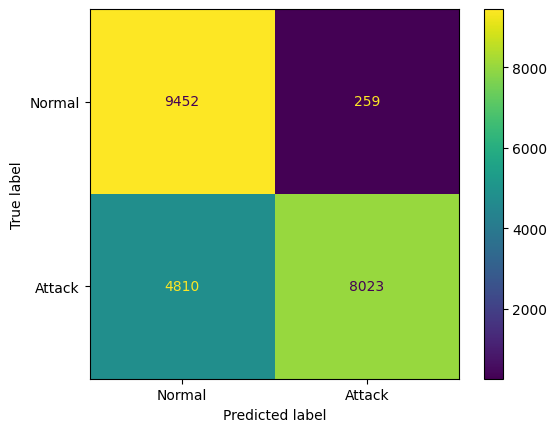

In [ ]:
metrics.ConfusionMatrixDisplay(random_forest,display_labels=['Normal','Attack']).plot()
plt.show()

In [ ]:
print(classification_report(y_test_df,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79      9711
           1       0.97      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.77     22544
weighted avg       0.84      0.78      0.77     22544



In [ ]:
feature_importances=np.round(rf_model.feature_importances_,3)
feature_names=columns_name
feature_importances_df=pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_importances_df.sort_values(by='Importance',ascending=False,inplace=True)

In [ ]:
feature_importances_df

Feature  Importance
113               src_bytes       0.167
2                 dst_bytes       0.119
23                  flag_SF       0.101
41            same_srv_rate       0.071
7    dst_host_same_srv_rate       0.048
..                      ...         ...
109            service_uucp       0.000
107           service_urh_i       0.000
106            service_time       0.000
118            su_attempted       0.000
119                  urgent       0.000

[121 rows x 2 columns]

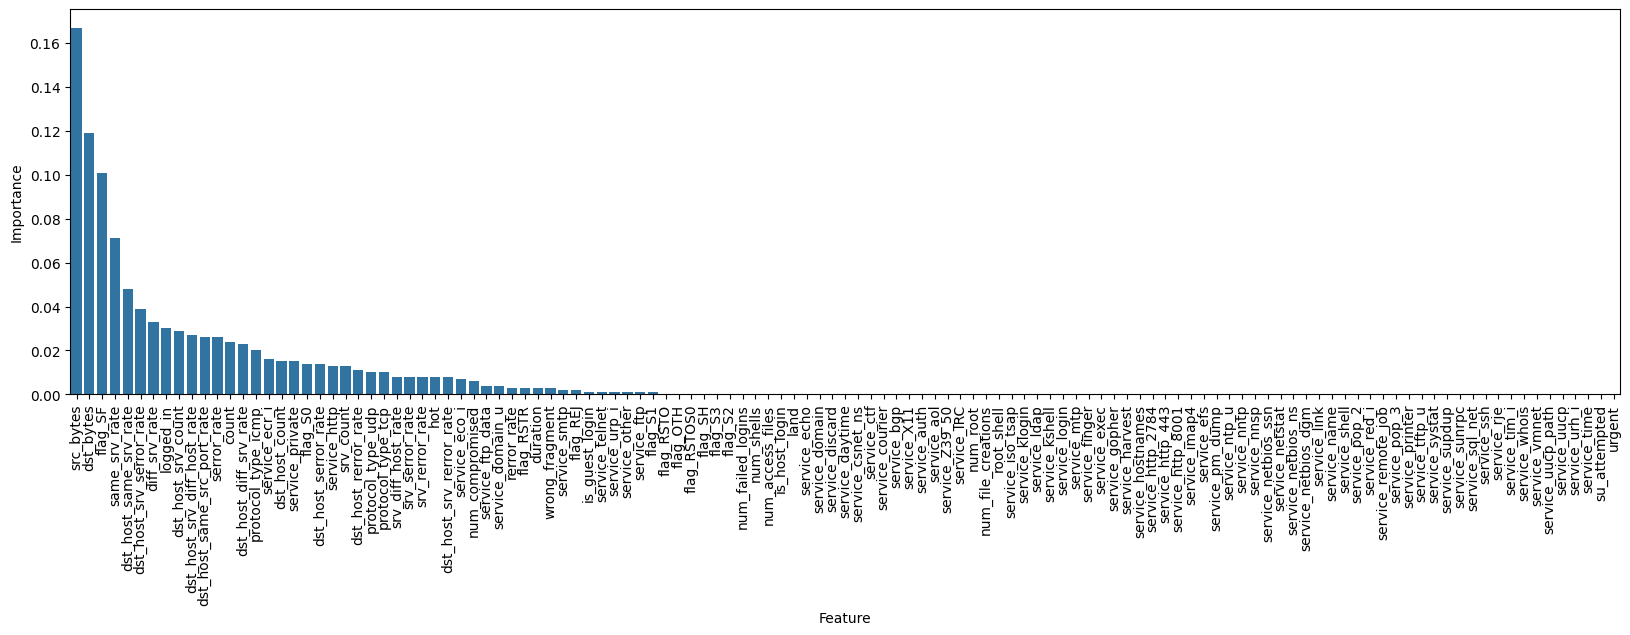

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature',y='Importance',data=feature_importances_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
selector=RFECV(rf_model,step=5,cv=5)
rfecv_time=time.time()
selector=selector.fit(x_train,y_train_df)
rfecv_time=time.time()-rfecv_time

In [ ]:
print(f"RFECV time: {rfecv_time:0.2f}s")

RFECV time: 991.82s


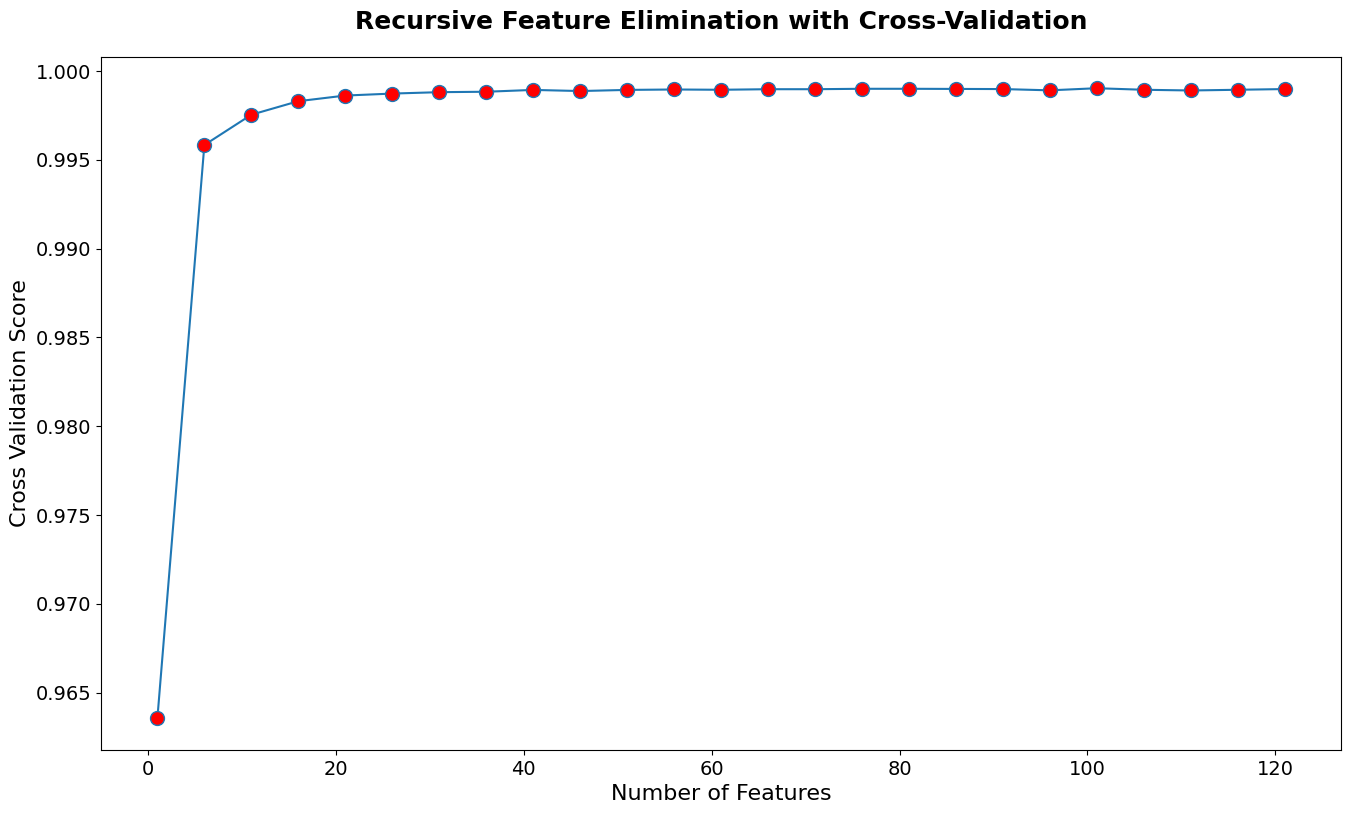

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Recursive Feature Elimination with Cross-Validation',fontsize=18,fontweight='bold',pad=20)
# Access the mean test scores from the cv_results_ attribute
plt.plot(selector.cv_results_['n_features'],selector.cv_results_['mean_test_score'],marker='o',markerfacecolor='red',markersize=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Features',fontsize=16)
plt.ylabel('Cross Validation Score',fontsize=16)
plt.show()

In [ ]:
selector.cv_results_

{'mean_test_score': array([0.96355567, 0.99584039, 0.9975471 , 0.99830917, 0.99862669,
        0.99873783, 0.99881721, 0.99884102, 0.99894422, 0.99888071,
        0.99894422, 0.99896803, 0.99895216, 0.99898391, 0.99898391,
        0.99900772, 0.99900773, 0.99899979, 0.99899185, 0.9989204 ,
        0.99903948, 0.99895216, 0.99891247, 0.99895216, 0.99899185]),
 'std_test_score': array([7.86211435e-04, 4.18021427e-04, 3.80171137e-04, 3.05978727e-04,
        1.11123306e-04, 1.47224581e-04, 1.26511712e-04, 1.76421073e-04,
        1.11126186e-04, 1.31400711e-04, 7.77687165e-05, 8.32515634e-05,
        1.08260696e-04, 9.25675688e-05, 8.91041167e-05, 1.12258105e-04,
        8.69452626e-05, 1.16126513e-04, 9.59136677e-05, 1.16114236e-04,
        1.13374401e-04, 1.34232272e-04, 8.17167344e-05, 1.59938261e-04,
        1.47651391e-04]),
 'split0_test_score': array([0.96364358, 0.99563405, 0.99726136, 0.99817424, 0.99869022,
        0.9987696 , 0.99888867, 0.99884898, 0.99900774, 0.99888867,
      

In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(rf_model,n_features_to_select=20,step=1)
fs_time=time.time()
rfe=rfe.fit(x_train_df,y_train_df)
fs_time=time.time()-fs_time
print(f"Feature selection time: {fs_time:0.2f}s")

Feature selection time: 976.80s


In [ ]:
#List of choosen feature
choosen_feature=x_train_df.columns[rfe.support_]
choosen_feature

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'flag_SF',
       'hot', 'logged_in', 'protocol_type_icmp', 'same_srv_rate',
       'service_ecr_i', 'service_http', 'service_private', 'src_bytes',
       'srv_count'],
      dtype='object')

In [ ]:
x_train_rfe=x_train_df.loc[:,rfe.support_]
x_test_rfe=x_test_df.loc[:,rfe.support_]

In [ ]:
x_train_rfe=scaler.fit_transform(x_train_rfe)
x_test_rfe=scaler.transform(x_test_rfe)

In [ ]:
post_rfe_time=time.time()
rf_model.fit(x_train_rfe,y_train_df)
post_rfe_time=time.time()-post_rfe_time
print(f"Training time: {post_rfe_time:0.2f}s")

Training time: 8.41s


In [ ]:
train_score=rf_model.score(x_train_rfe,y_train_df)
train_score

0.9999364943281497

In [ ]:
y_pred=rf_model.predict(x_test_rfe)
rf_model.score(x_test_rfe,y_test_df)

0.7620652945351313

In [ ]:
test_score=metrics.accuracy_score(y_test_df,y_pred)
test_score

0.7620652945351313

In [ ]:
new_row = pd.DataFrame({'Model':['Random Forest Post Feature Selection'],'train':[train_score],'test':[test_score],'train time':[post_rfe_time]})
report = pd.concat([report, new_row], ignore_index=True)
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568

In [ ]:
random_forest=metrics.confusion_matrix(y_test_df,y_pred)
random_forest

array([[9450,  261],
       [5103, 7730]])

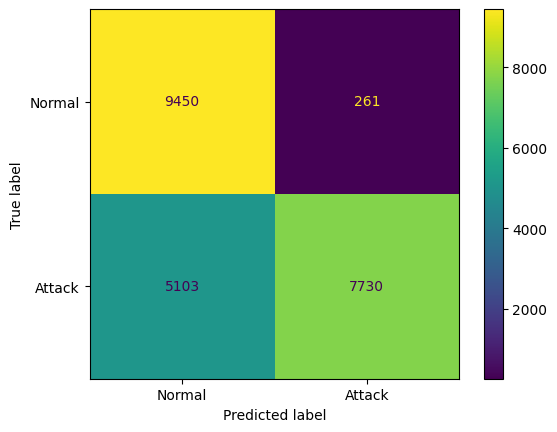

In [ ]:
metrics.ConfusionMatrixDisplay(random_forest,display_labels=['Normal','Attack']).plot()
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=30,n_jobs=-1,)
knn_time=time.time()
knn_model.fit(x_train_rfe,y_train_df)
knn_time=time.time()-knn_time

In [ ]:
y_pred=knn_model.predict(x_test_rfe)

In [ ]:
test_score=knn_model.score(x_test_rfe,y_test_df)
test_score

0.7571859474804826

In [ ]:
train_score=knn_model.score(x_train_rfe,y_train_df)
train_score

0.9936891238598747

In [ ]:
new_row = pd.DataFrame({'Model':['KNN'],'train':[train_score],'test':[test_score],'train time':knn_time})
report = pd.concat([report, new_row], ignore_index=True)
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568
2                                   KNN  0.993689  0.757186    0.016737

In [ ]:
knn=metrics.confusion_matrix(y_test_df,y_pred)
knn

array([[9392,  319],
       [5155, 7678]])

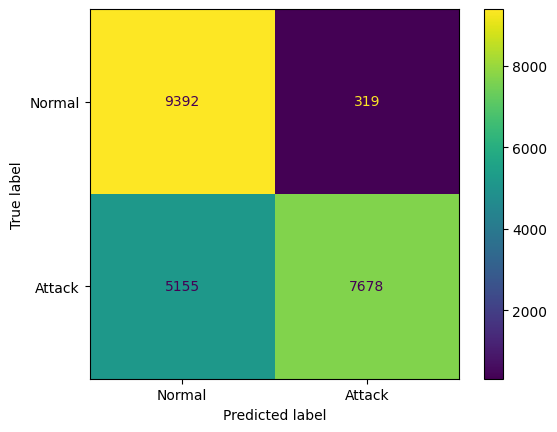

In [ ]:
metrics.ConfusionMatrixDisplay(knn,display_labels=['Normal','Attack']).plot()
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train_rfe,y_train_df)

GaussianNB()

In [ ]:
y_pred=nb_model.predict(x_test_rfe)
test_score=nb_model.score(x_test_rfe,y_test_df)
test_score

0.7620209368346345

In [ ]:
train_score=nb_model.score(x_train_rfe,y_train_df)
train_score

0.9458614147476047

In [ ]:
new_row = pd.DataFrame({'Model':['Naive Bayes'],'train':[train_score],'test':[test_score]})
report = pd.concat([report, new_row], ignore_index=True)
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568
2                                   KNN  0.993689  0.757186    0.016737
3                           Naive Bayes  0.945861  0.762021         NaN

In [ ]:
nb=metrics.confusion_matrix(y_test_df,y_pred)
nb

array([[8645, 1066],
       [4299, 8534]])

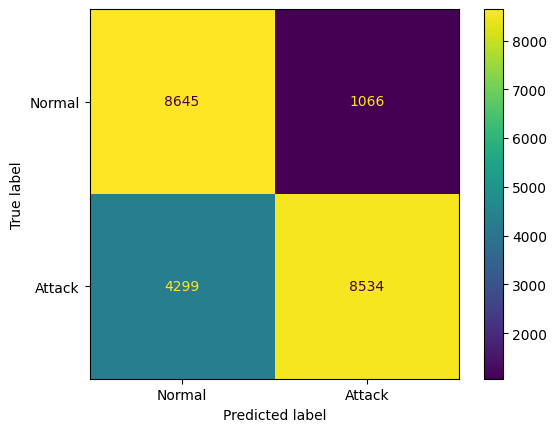

In [ ]:
metrics.ConfusionMatrixDisplay(nb,display_labels=['Normal','Attack']).plot()
plt.show()

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=3)
dt_time=time.time()
dt_model.fit(x_train_rfe,y_train_df)
dt_time=time.time()-dt_time

In [ ]:
train_score=dt_model.score(x_train_rfe,y_train_df)
train_score

0.9746612369317235

In [ ]:
y_pred=dt_model.predict(x_test_rfe)
test_score=dt_model.score(x_test_rfe,y_test_df)
test_score

0.7969748048261178

In [ ]:
new_row = pd.DataFrame({'Model':['Decision Tree'],'train':[train_score],'test':[test_score],'train time':dt_time})
report = pd.concat([report, new_row], ignore_index=True)
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568
2                                   KNN  0.993689  0.757186    0.016737
3                           Naive Bayes  0.945861  0.762021         NaN
4                         Decision Tree  0.974661  0.796975    0.206618

# SVM

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train_rfe,y_train_df)

SVC()

In [ ]:
y_pred=svm_model.predict(x_test_rfe)
test_score=svm_model.score(x_test_rfe,y_test_df)
test_score

0.7606014904187367

In [ ]:
train_score=svm_model.score(x_train_rfe,y_train_df)
train_score

0.9933319044557167

In [ ]:
new_row = pd.DataFrame({'Model':['SVM'],'train':[train_score],'test':[test_score]})
report = pd.concat([report, new_row], ignore_index=True)
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568
2                                   KNN  0.993689  0.757186    0.016737
3                           Naive Bayes  0.945861  0.762021         NaN
4                         Decision Tree  0.974661  0.796975    0.206618
5                                   SVM  0.993332  0.760601         NaN

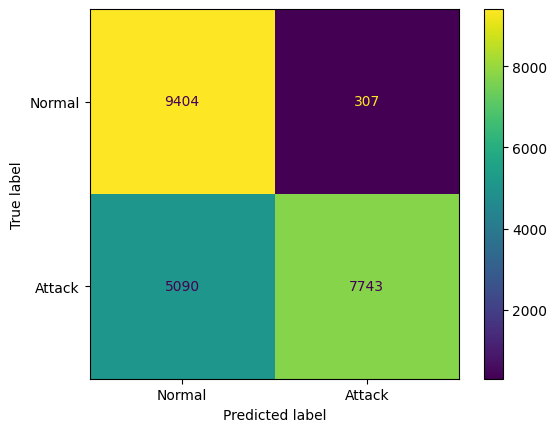

In [ ]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_df,y_pred),display_labels=['Normal','Attack']).plot()
plt.show()

# XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train_rfe,y_train_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb_model.predict(x_test_rfe)
test_score=xgb_model.score(x_test_rfe,y_test_df)
test_score

0.7767476933995742

In [ ]:
train_score=xgb_model.score(x_train_rfe,y_train_df)
train_score

0.9998491740293555

In [ ]:
new_row = pd.DataFrame({'Model':['XGBoost'],'train':[train_score],'test':[test_score]})
report = pd.concat([report, new_row], ignore_index=True)
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568
2                                   KNN  0.993689  0.757186    0.016737
3                           Naive Bayes  0.945861  0.762021         NaN
4                         Decision Tree  0.974661  0.796975    0.206618
5                                   SVM  0.993332  0.760601         NaN
6                               XGBoost  0.999849  0.776748         NaN

Choose model with the best score to improve by tune its hyperparamater

# Decision Tree Final

GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
citreria=['gini','entropy']
max_features=np.arange(3,10)
max_depth=np.arange(3,10)
param_grid=dict(criterion=citreria,max_features=max_features,max_depth=max_depth)
model = DecisionTreeClassifier(random_state=45)
gscv=GridSearchCV(model,param_grid,cv=5)
gscv.fit(x_train_rfe,y_train_df)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([3, 4, 5, 6, 7, 8, 9])})

In [ ]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': np.int64(9), 'max_features': np.int64(7)}

In [ ]:
gscv.best_score_

np.float64(0.995348203674749)

In [ ]:
dt_f=gscv.best_estimator_
dt_f.fit(x_train_rfe,y_train_df)

DecisionTreeClassifier(max_depth=np.int64(9), max_features=np.int64(7),
                       random_state=45)

In [ ]:
dt_f.score(x_test_rfe,y_test_df)

0.8155163236337828

In [ ]:
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568
2                                   KNN  0.993689  0.757186    0.016737
3                           Naive Bayes  0.945861  0.762021         NaN
4                         Decision Tree  0.974661  0.796975    0.206618
5                                   SVM  0.993332  0.760601         NaN
6                               XGBoost  0.999849  0.776748         NaN

In [ ]:
dt_fin=DecisionTreeClassifier(max_depth=9,max_features=7,random_state=45)
dt_fin_time=time.time()
dt_fin.fit(x_train_rfe,y_train_df)
dt_fin_time=time.time()-dt_fin_time

In [ ]:
y_pred=dt_fin.predict(x_test_rfe)
test_score=metrics.accuracy_score(y_test_df,y_pred)
test_score

0.8155163236337828

In [ ]:
train_score=dt_fin.score(x_train_rfe,y_train_df)
train_score

0.9971739976026609

In [ ]:
print(classification_report(y_test_df,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      9711
           1       0.96      0.71      0.81     12833

    accuracy                           0.82     22544
   macro avg       0.84      0.83      0.82     22544
weighted avg       0.85      0.82      0.82     22544



In [ ]:
new_row = pd.DataFrame({'Model':['Decision Tree Final'],'train':[train_score],'test':[test_score],'train time':[dt_fin_time]})
report = pd.concat([report, new_row], ignore_index=True)
report

Model     train      test  train time
0   Random Forest Pre Feature Selection  0.999944  0.775151   12.350678
1  Random Forest Post Feature Selection  0.999936  0.762065    8.410568
2                                   KNN  0.993689  0.757186    0.016737
3                           Naive Bayes  0.945861  0.762021         NaN
4                         Decision Tree  0.974661  0.796975    0.206618
5                                   SVM  0.993332  0.760601         NaN
6                               XGBoost  0.999849  0.776748         NaN
7                   Decision Tree Final  0.997174  0.815516    0.191221

In [ ]:
train_gini=2*metrics.roc_auc_score(y_train_df,dt_fin.predict(x_train_rfe))-1
print(f"Gini index on the train data: {train_gini}")
test_gini=2*metrics.roc_auc_score(y_test_df,dt_fin.predict(x_test_rfe))-1
print(f"Gini index on the test data: {test_gini}")

Gini index on the train data: 0.9942038683596195
Gini index on the test data: 0.6660682615614322


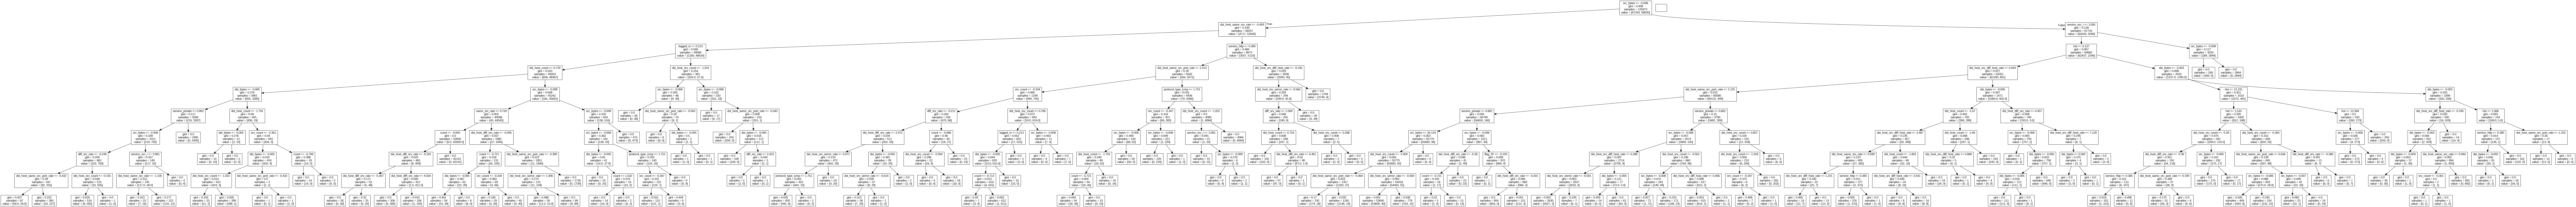

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from PIL import Image as PIL_Image
dot_data = StringIO()
export_graphviz(dt_fin, out_file=dot_data,
                feature_names = choosen_feature)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dt_fin.png')
img=PIL_Image.open('dt_fin.png')
img

In [ ]:
report.to_csv('report.csv',index=False)

# Try with other feature selections method

Filter Method

correlation

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data_LE=train_data.copy()
test_data_LE=test_data.copy()
for val in train_data_LE['attack_label'].unique():
  if val!='normal':
    train_data_LE['attack_label'].replace(val,'attack',inplace=True)
for val in test_data_LE['attack_label'].unique():
  if val!='normal':
    test_data_LE['attack_label'].replace(val,'attack',inplace=True)
train_data_LE['attack_label'].replace('normal',0,inplace=True)
train_data_LE['attack_label'].replace('attack',1,inplace=True)
test_data_LE['attack_label'].replace('normal',0,inplace=True)
test_data_LE['attack_label'].replace('attack',1,inplace=True)

<ipython-input-221-07cb02fca931>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_LE['attack_label'].replace(val,'attack',inplace=True)
<ipython-input-221-07cb02fca931>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
train_data_LE.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_label  
0                      0.00             0  
1                      0.00             0  
2                      0.00             1  
3                      0.01             0  
4                      0.00             0  

[5 rows x 41 columns]

In [ ]:
for col in train_data_LE.select_dtypes(include=['object']).columns:
  train_data_LE[col]=le.fit_transform(train_data_LE[col])
  test_data_LE[col]=le.transform(test_data_LE[col])

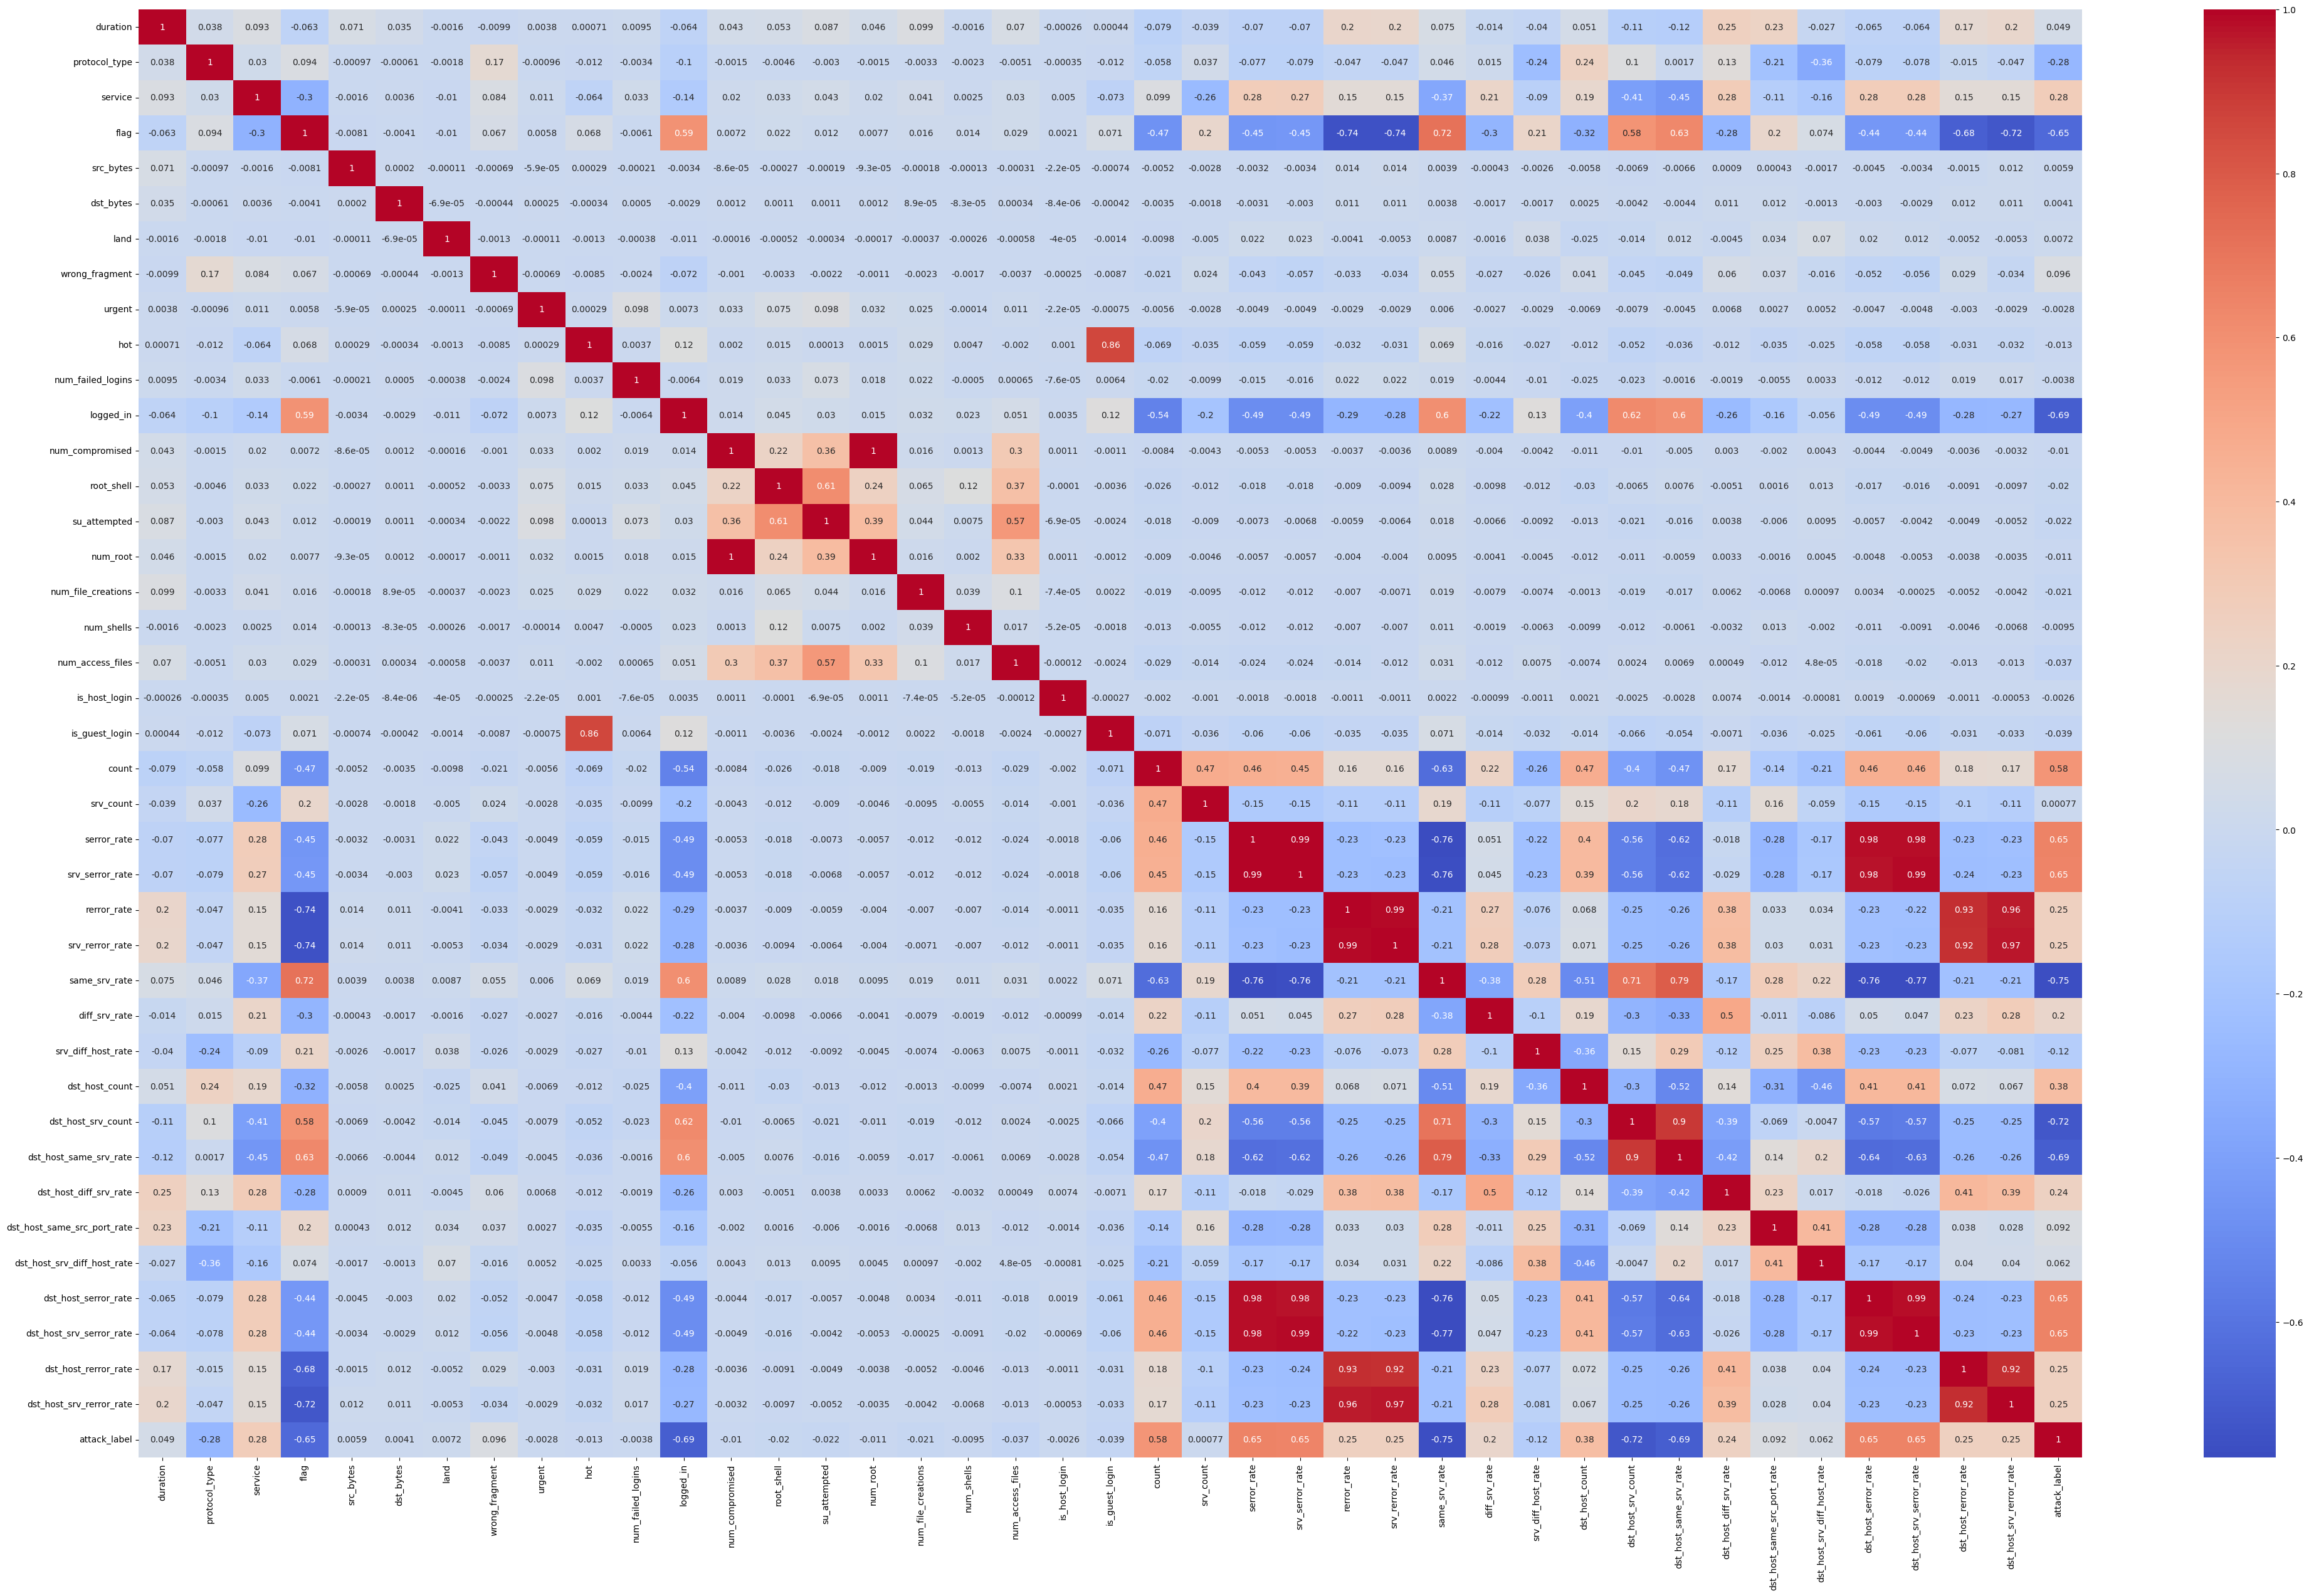

In [ ]:
plt.figure(figsize=(50,30))
corr_matrix=train_data_LE.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

['num_root',
 'is_guest_login',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
train_data_LE.drop(to_drop,axis=1,inplace=True)
test_data_LE.drop(to_drop,axis=1,inplace=True)

In [ ]:
x_train_le,y_train_le=train_data_LE[train_data_LE.columns.difference(['attack_label'])],train_data_LE['attack_label']
x_test_le,y_test_le=test_data_LE[test_data_LE.columns.difference(['attack_label'])],test_data_LE['attack_label']

In [ ]:
scaler=StandardScaler()
x_train_le=scaler.fit_transform(x_train_le)
x_test_le=scaler.transform(x_test_le)

In [ ]:
x_train_le.shape

(125973, 31)

In [ ]:
rf_model.fit(x_train_le,y_train_le)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf_model.score(x_train_le,y_train_le)

0.9999364943281497

In [ ]:
y_pred=rf_model.predict(x_test_le)
rf_model.score(x_test_le,y_test_le)

0.7729329311568488

In [ ]:
citreria=['gini','entropy']
max_features=np.arange(3,31)
max_depth=np.arange(3,10)
param_grid=dict(criterion=citreria,max_features=max_features,max_depth=max_depth)
model = DecisionTreeClassifier(random_state=45)
gscv_corr=GridSearchCV(model,param_grid,cv=5)
gscv_corr.fit(x_train_le,y_train_le)